In [30]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', palette='viridis')
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [31]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# EDA

In [32]:
#There are no null values
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [33]:
#describe the data
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [34]:
#duplicate
df.duplicated().sum()

0

# Visualization

<AxesSubplot:ylabel='Frequency'>

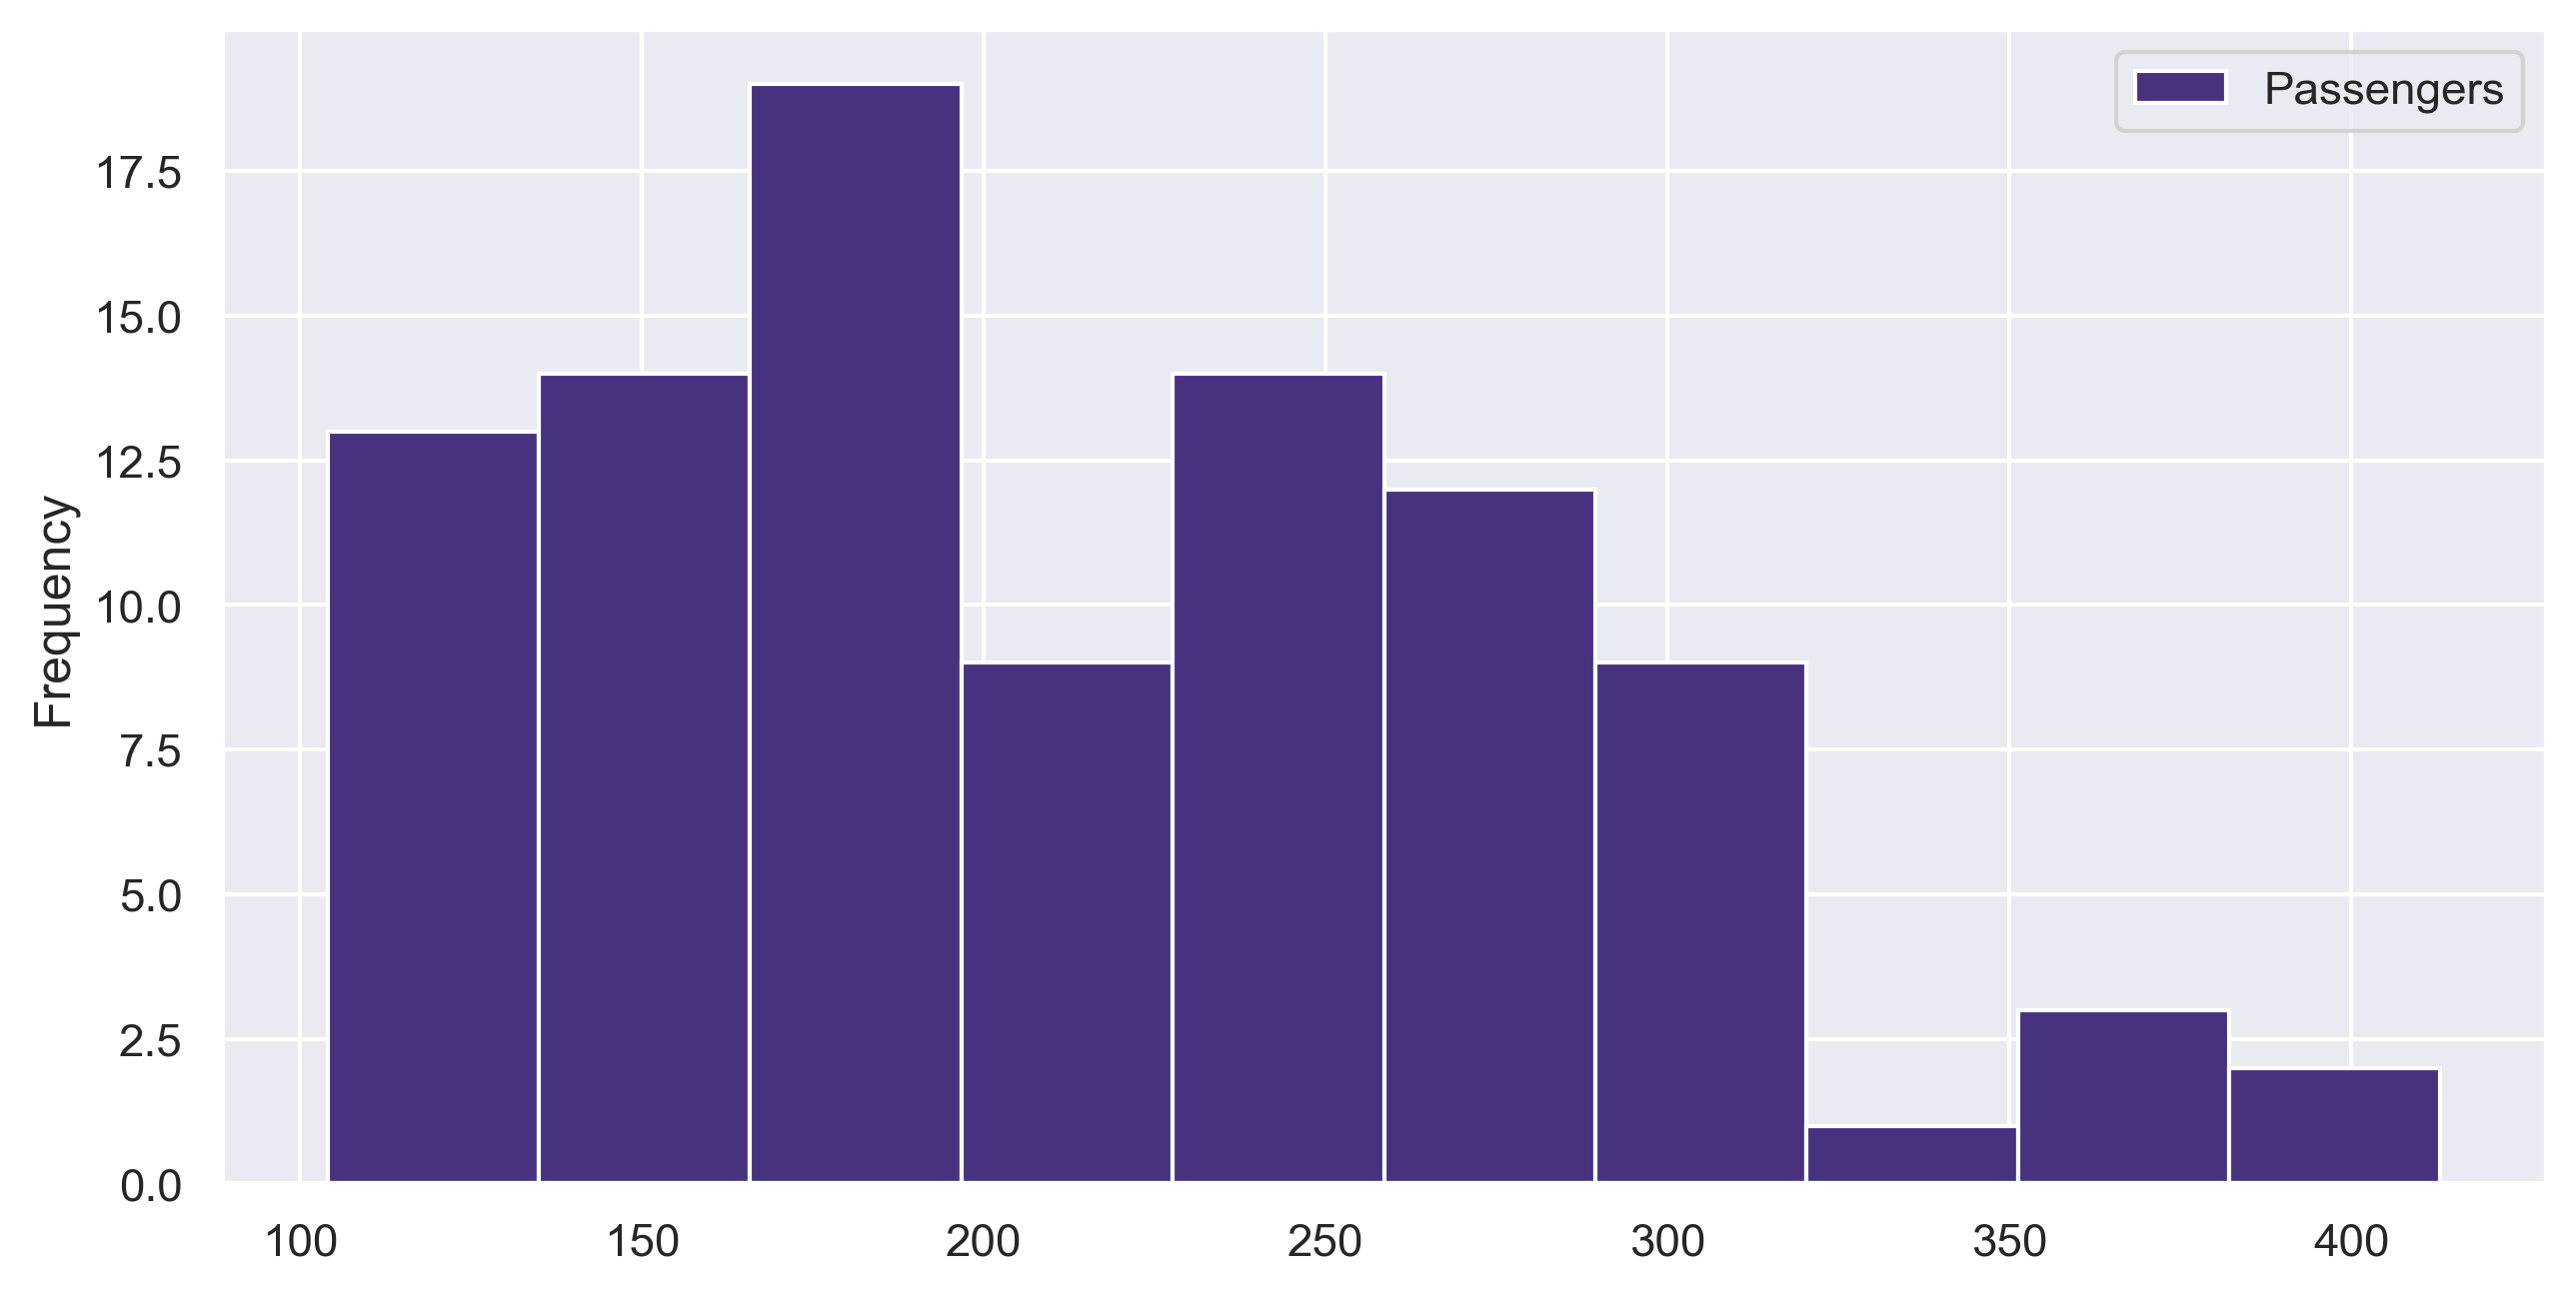

In [35]:
df.plot(kind='hist')

<AxesSubplot:>

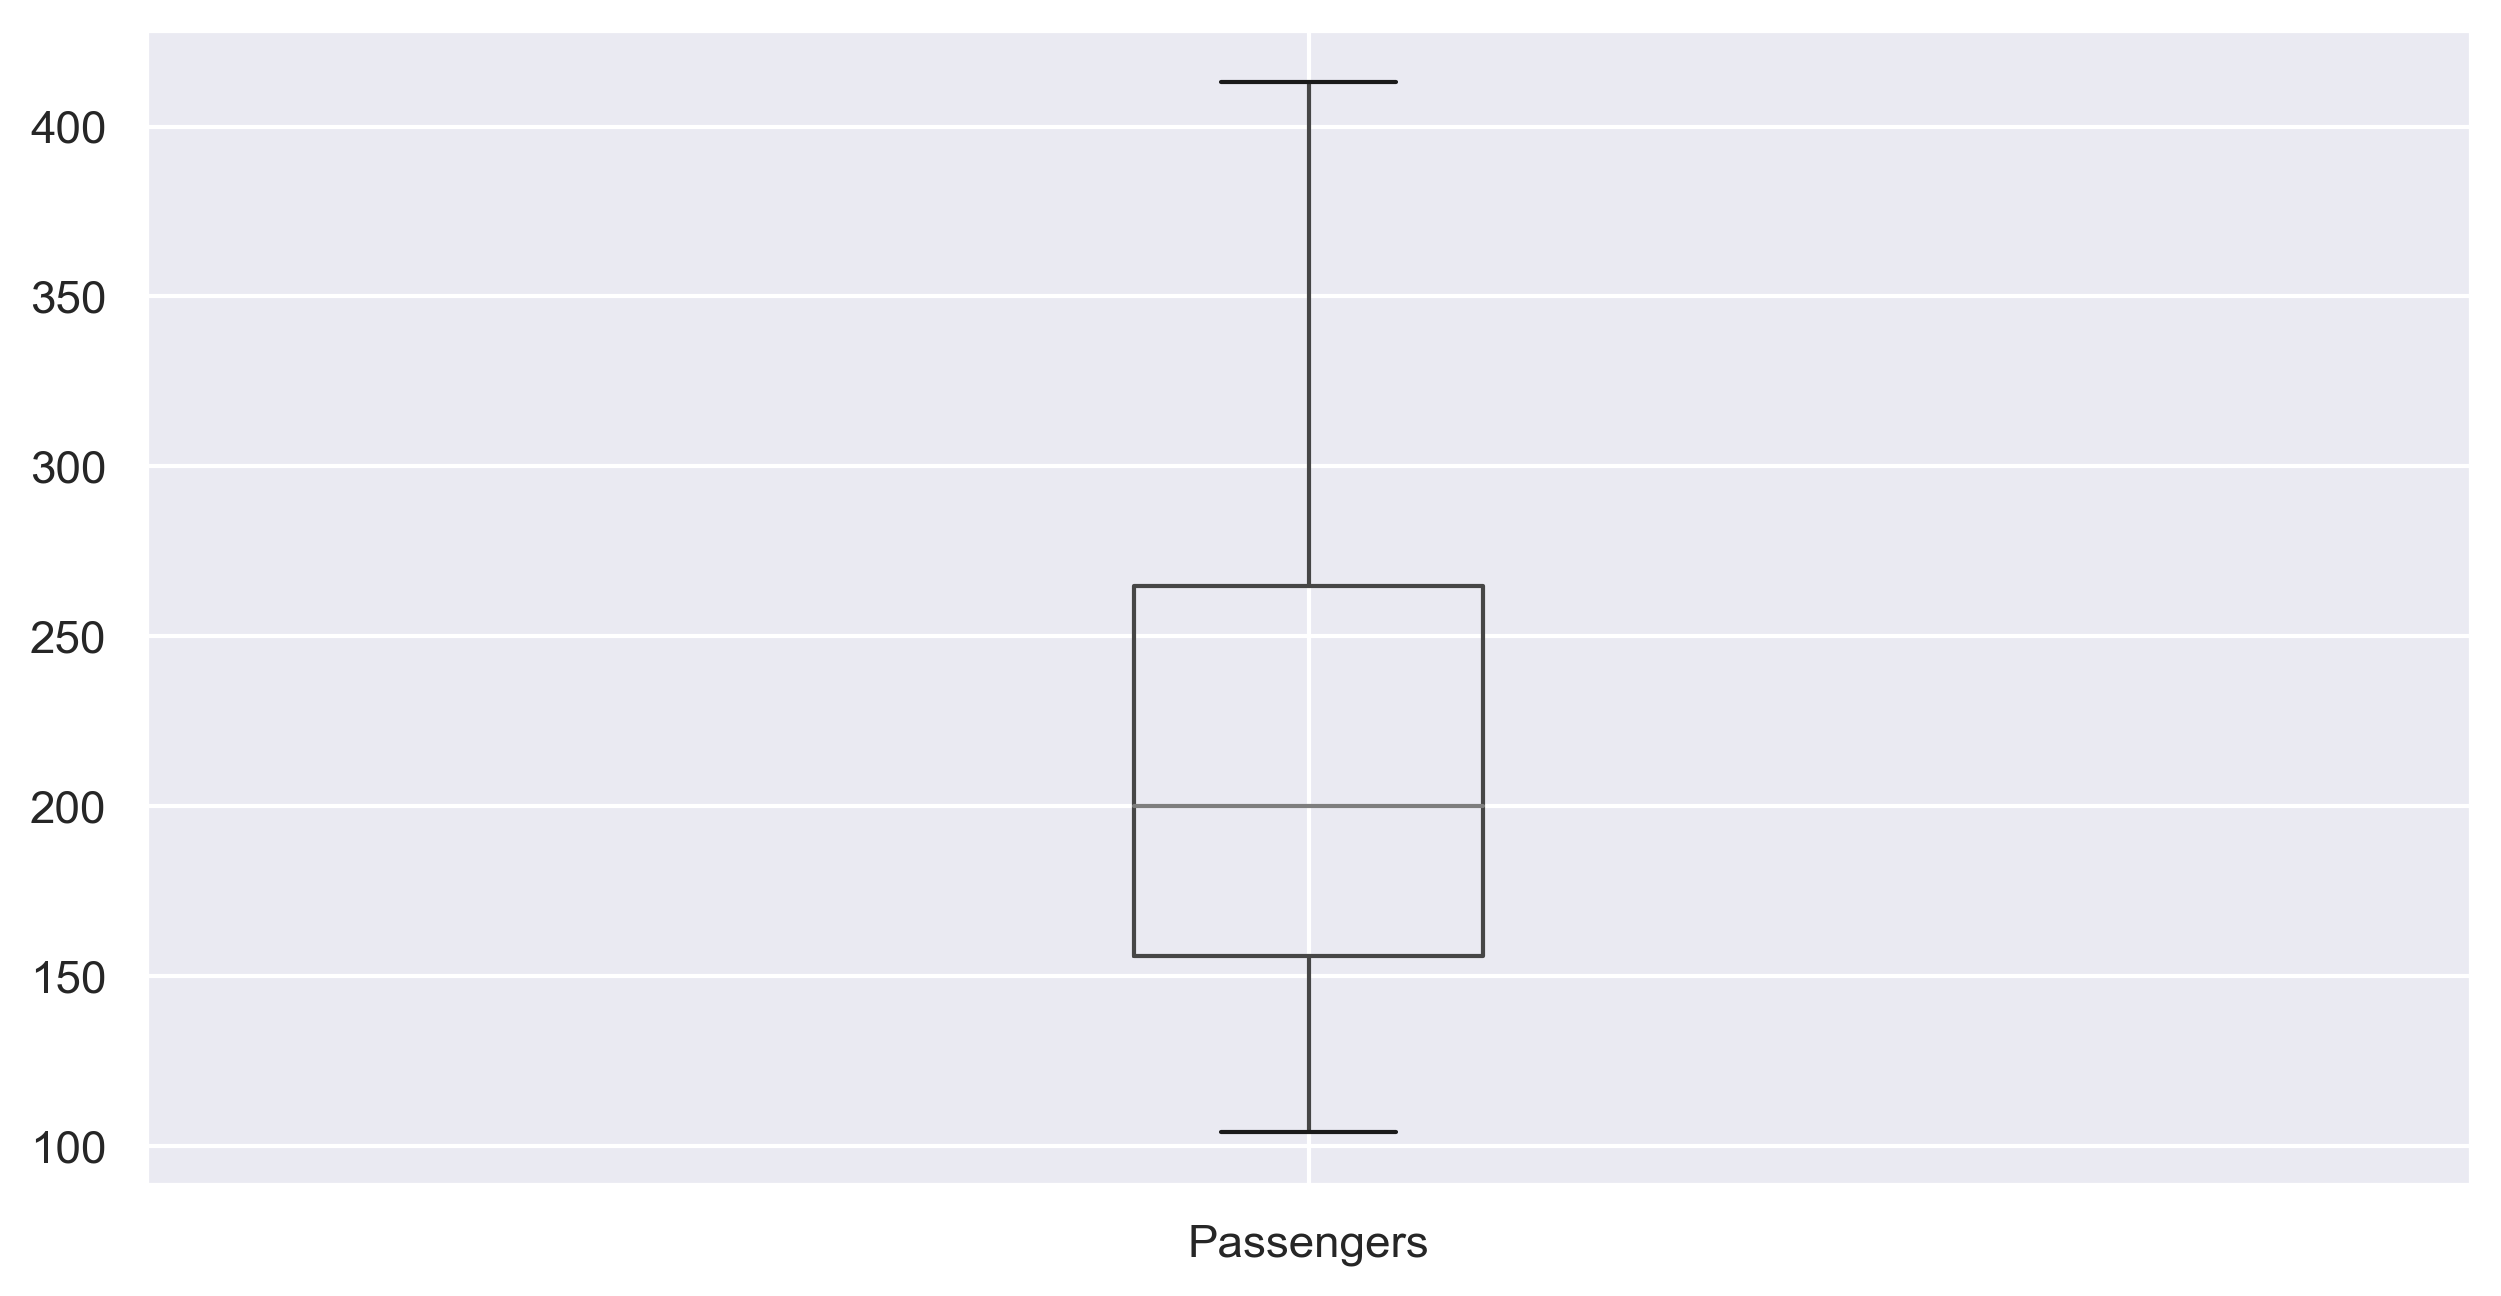

In [36]:
df.boxplot()

The passengers data follows a normal distribution. It doesnot contain any outliers.

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

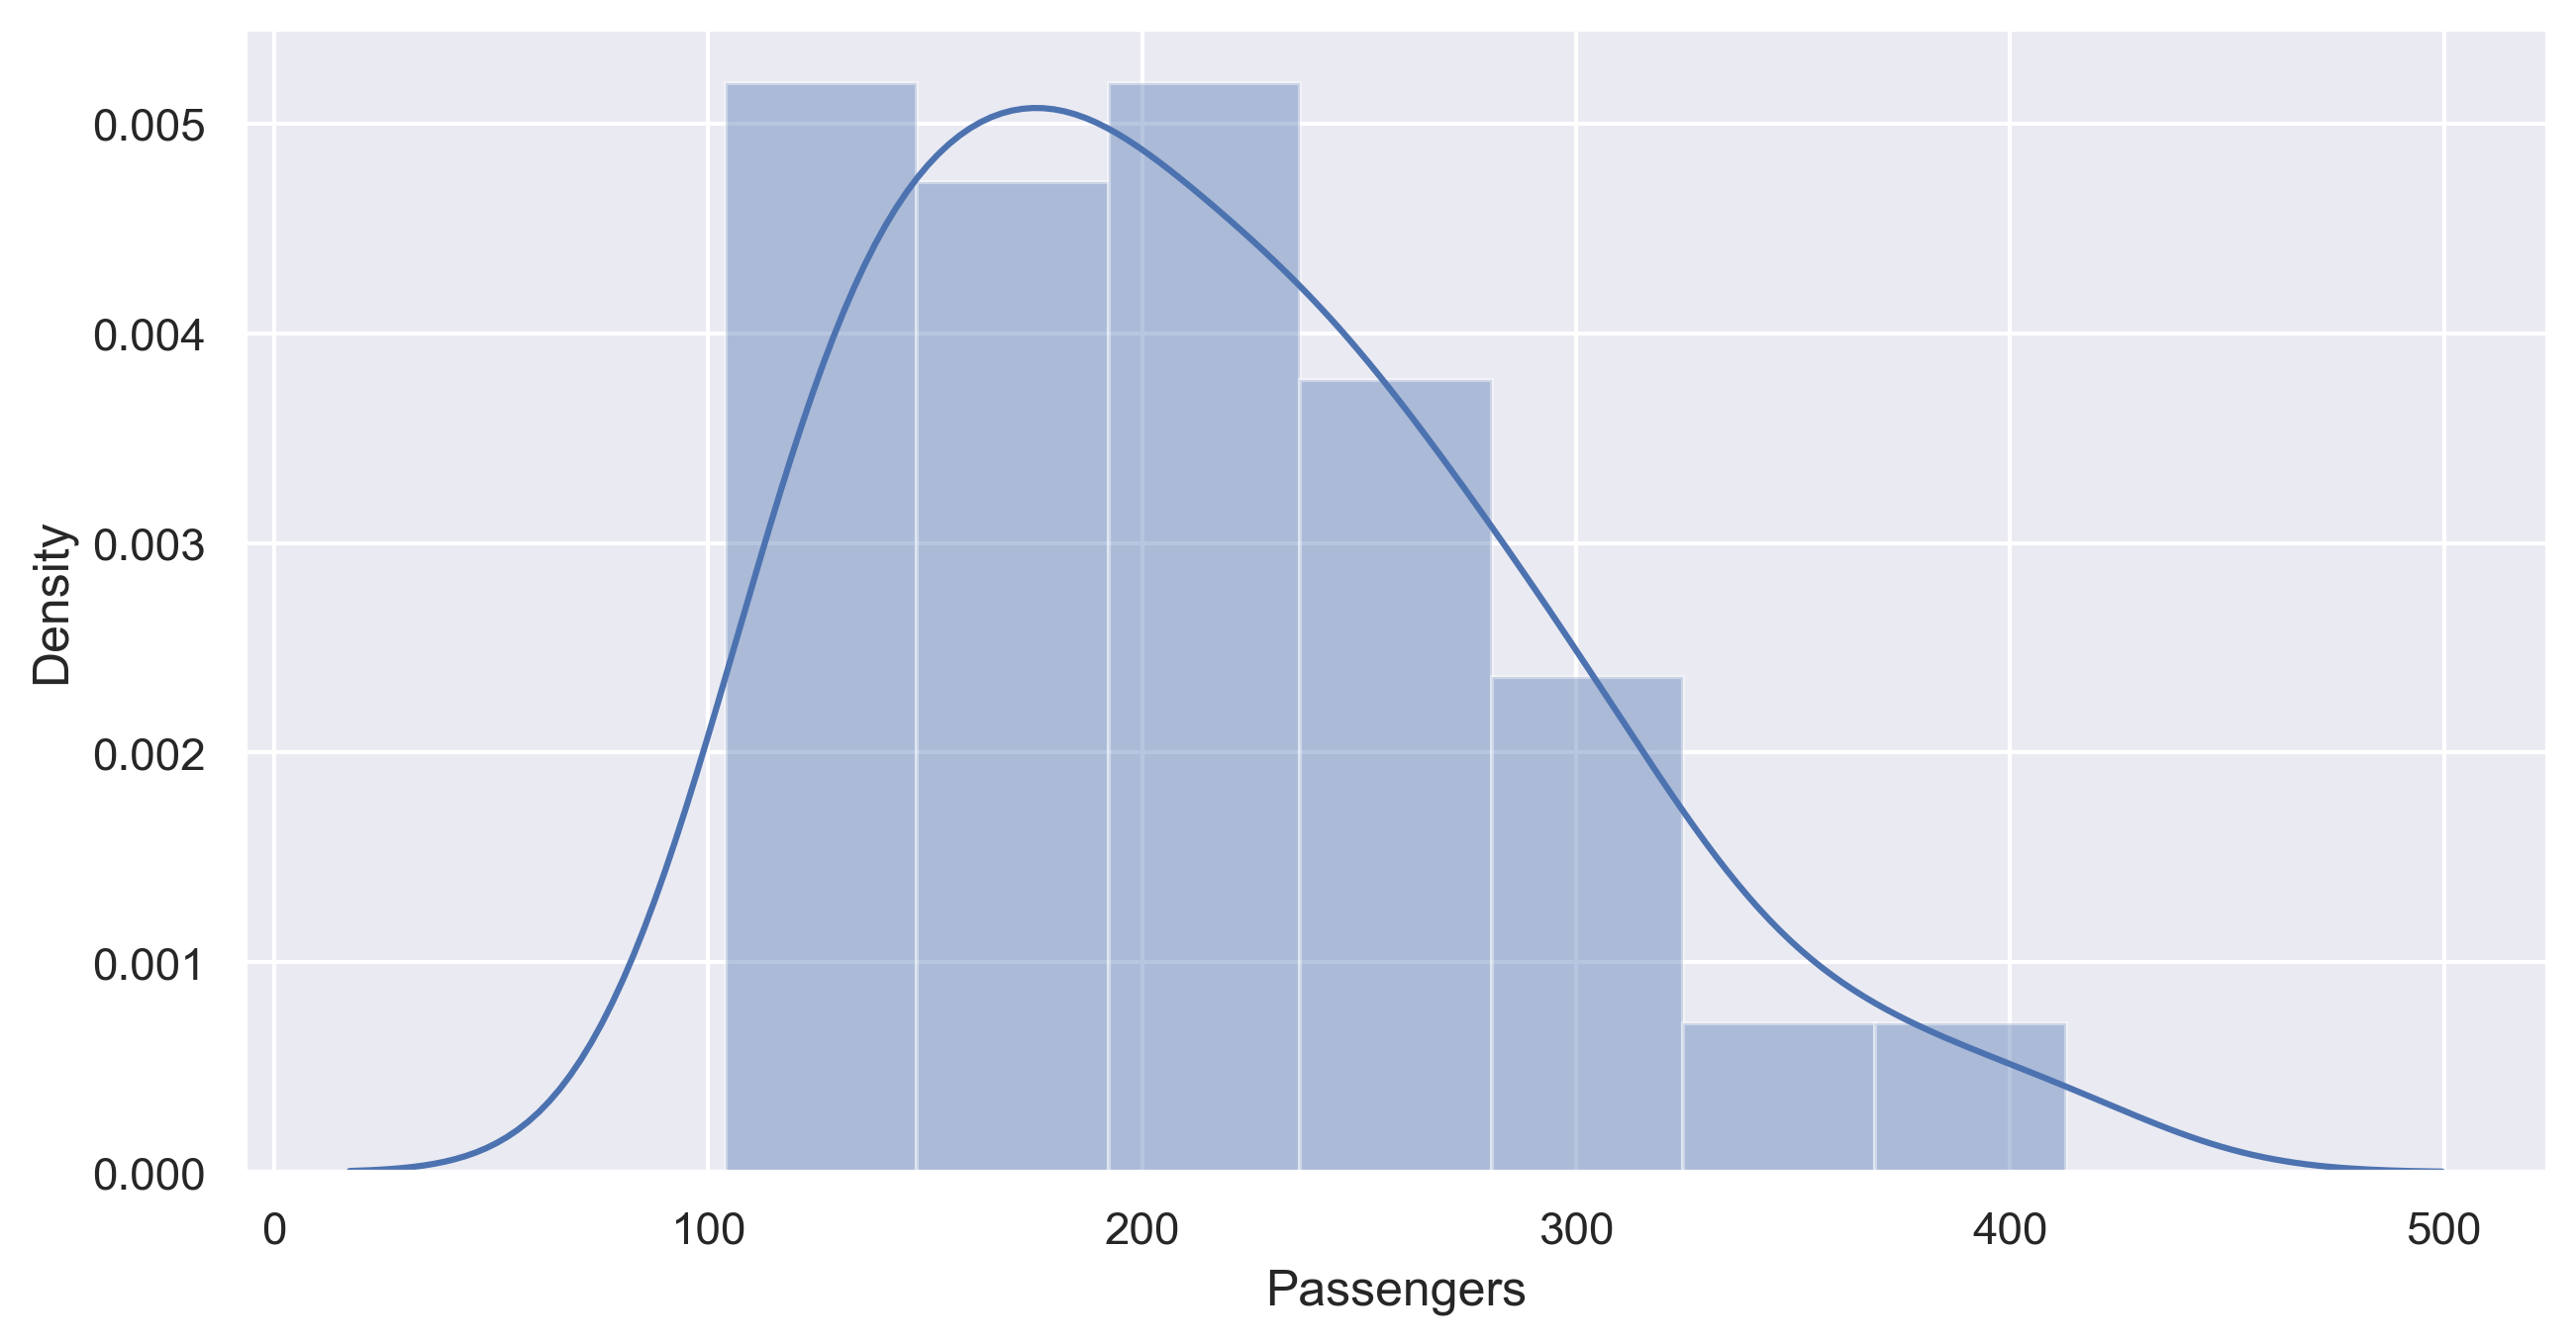

In [37]:
sns.set_theme()
sns.distplot(df['Passengers'], kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


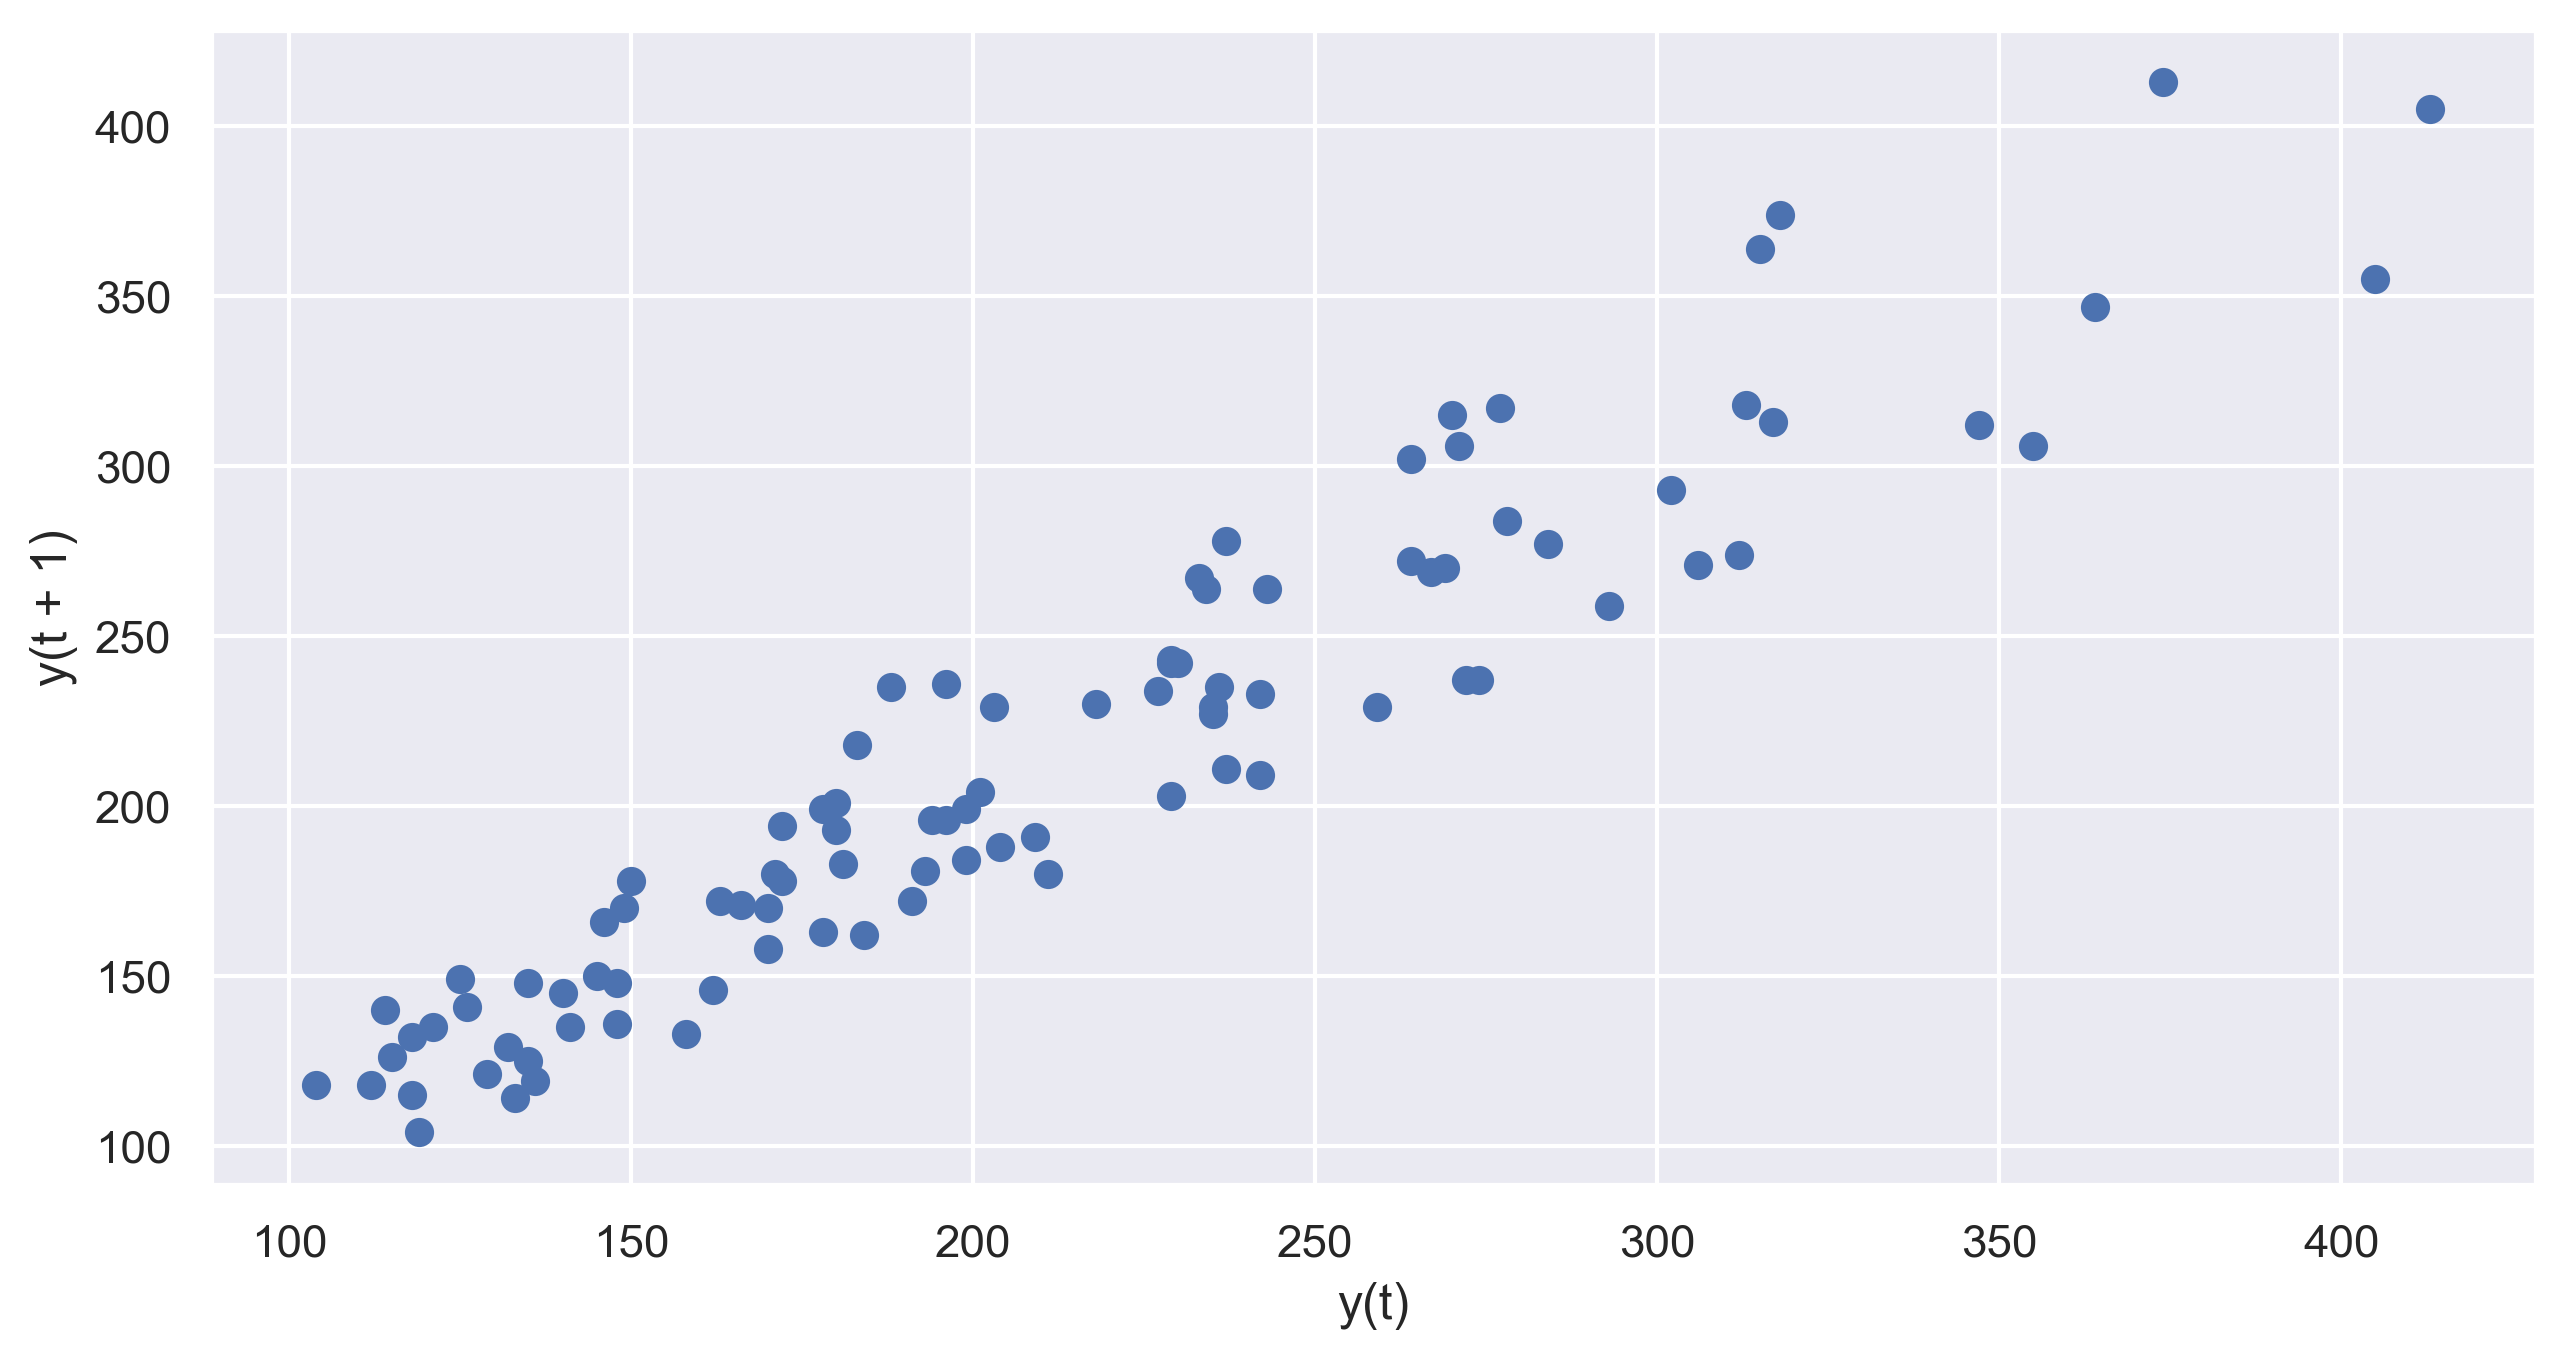

In [38]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(df['Passengers'])
plt.show()

In [39]:
df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
df=df.set_index(['Month'])

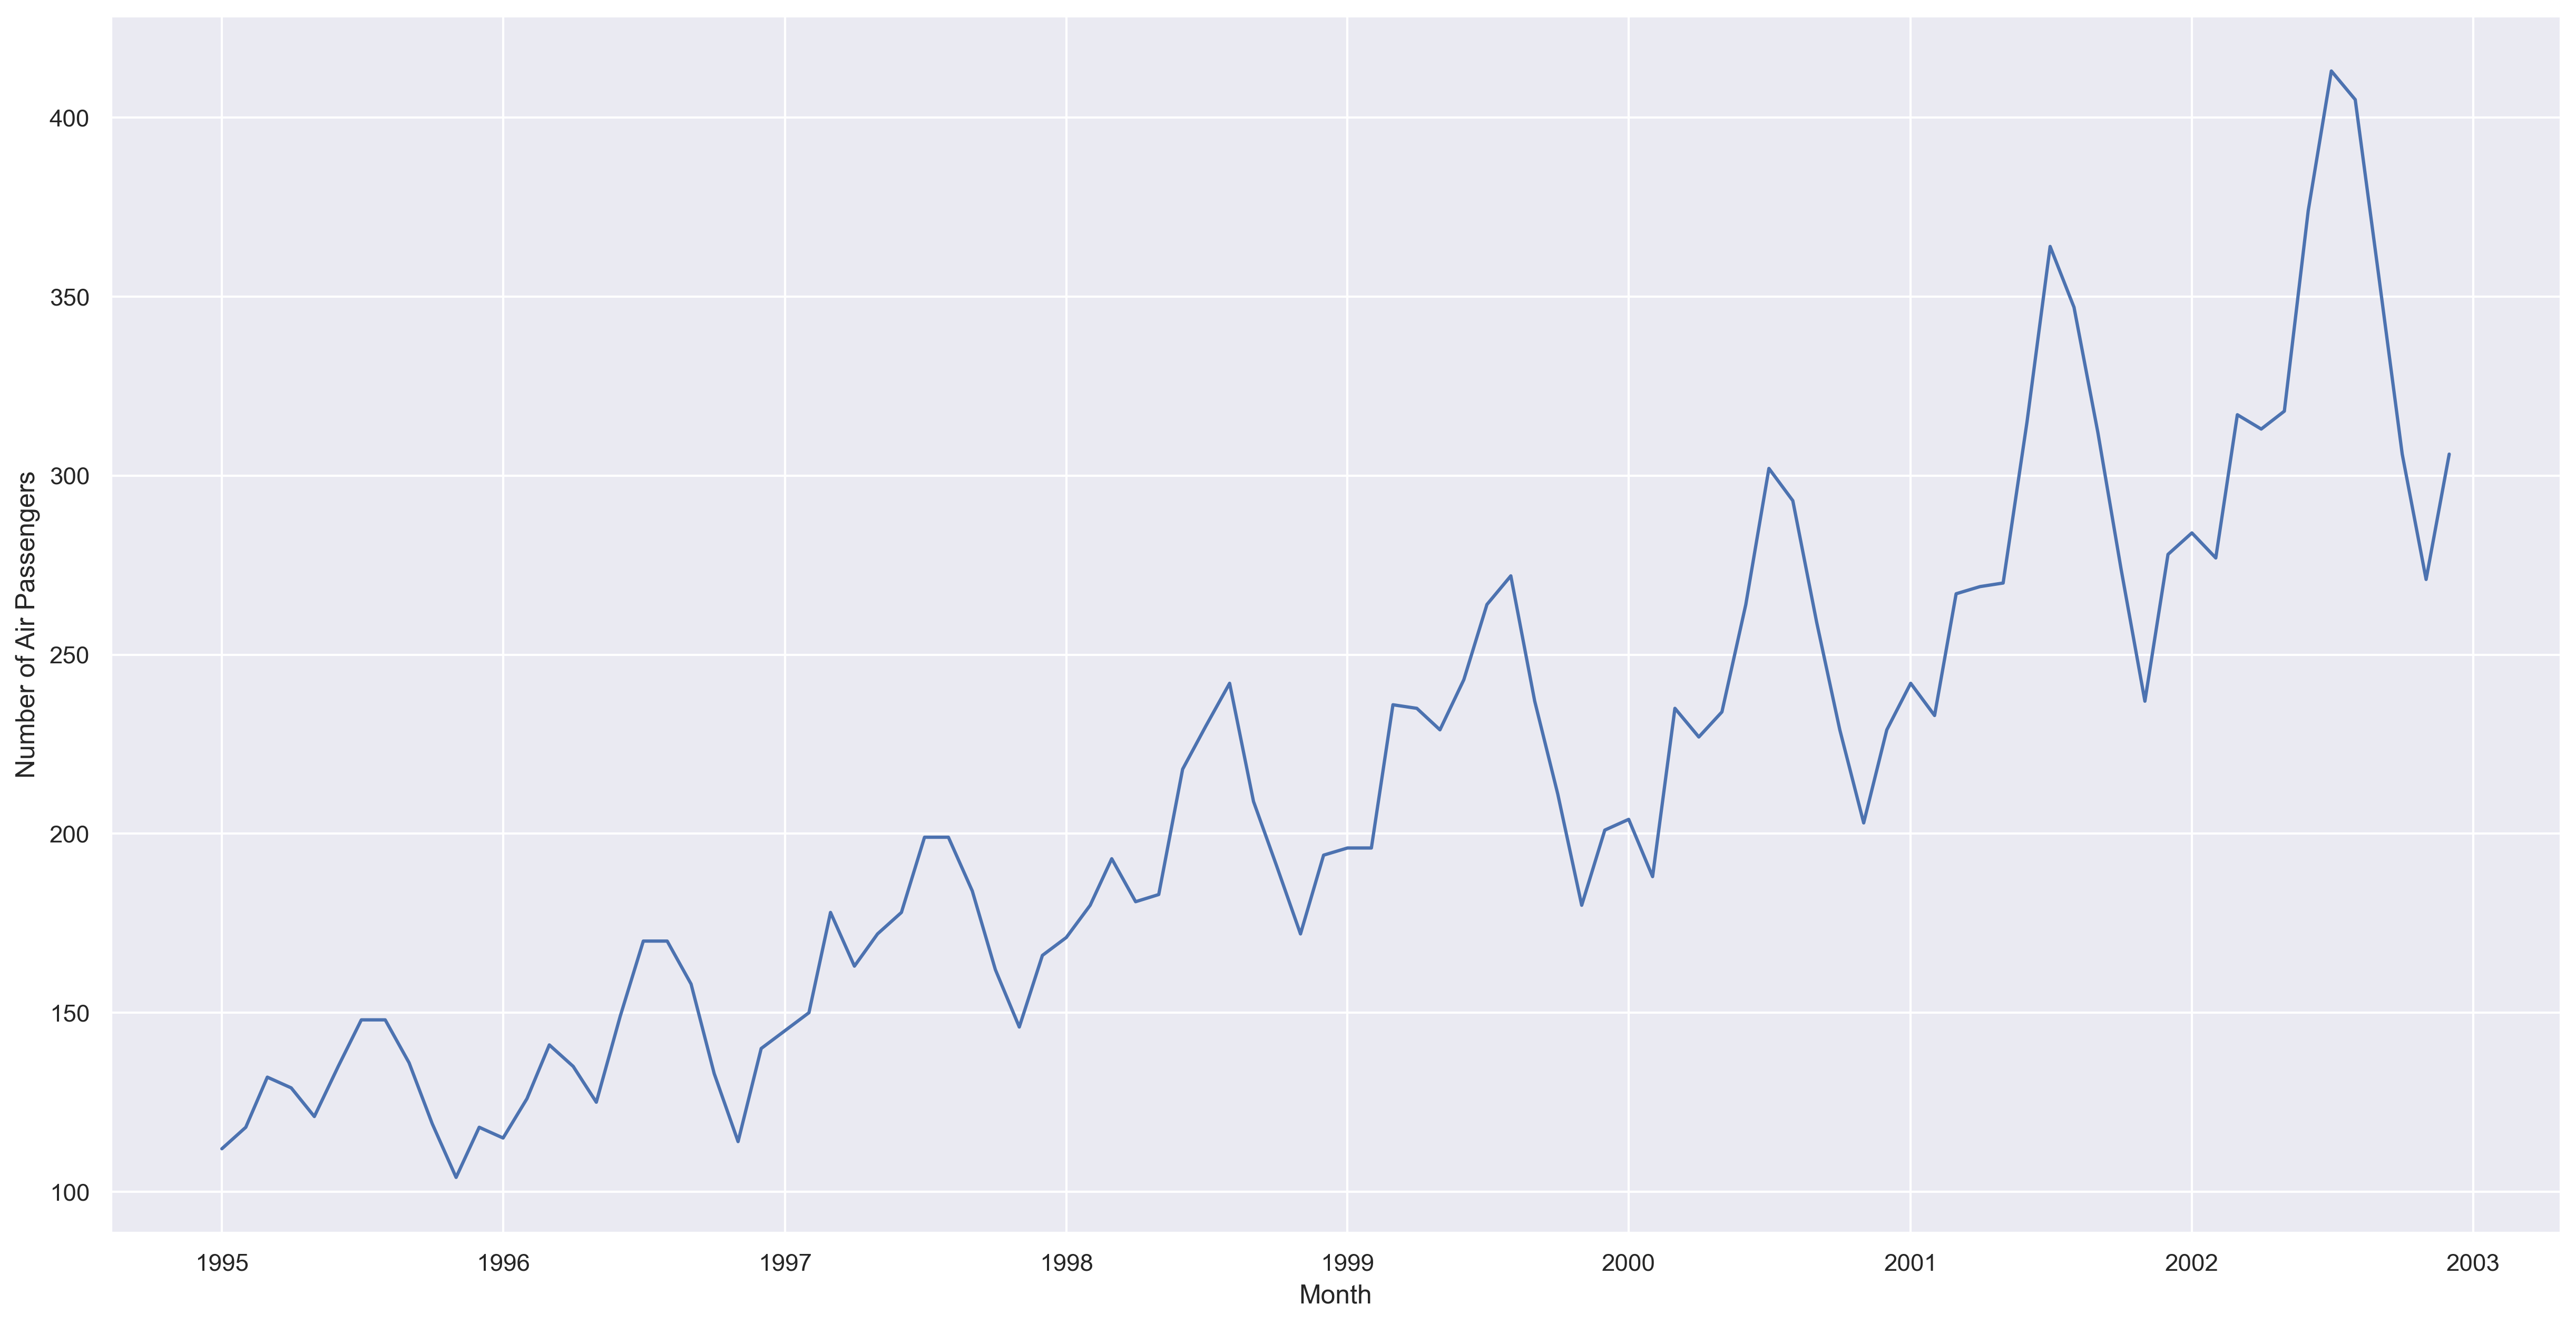

In [40]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df)

Here from the line plot of pur time series data we can see that no data for any year is missing.
This seems to be linear Trend with a multiplicative seasonality.Just in case I want to analyse the monthly data as well to check for data sanity.

In [41]:
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01  126.666667
1996-01-01  126.916667
1996-02-01  127.583333
1996-03-01  128.333333
            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01   13.720147
1996-01-01   13.453342
1996-02-01   13.166475
1996-03-01   13.686977


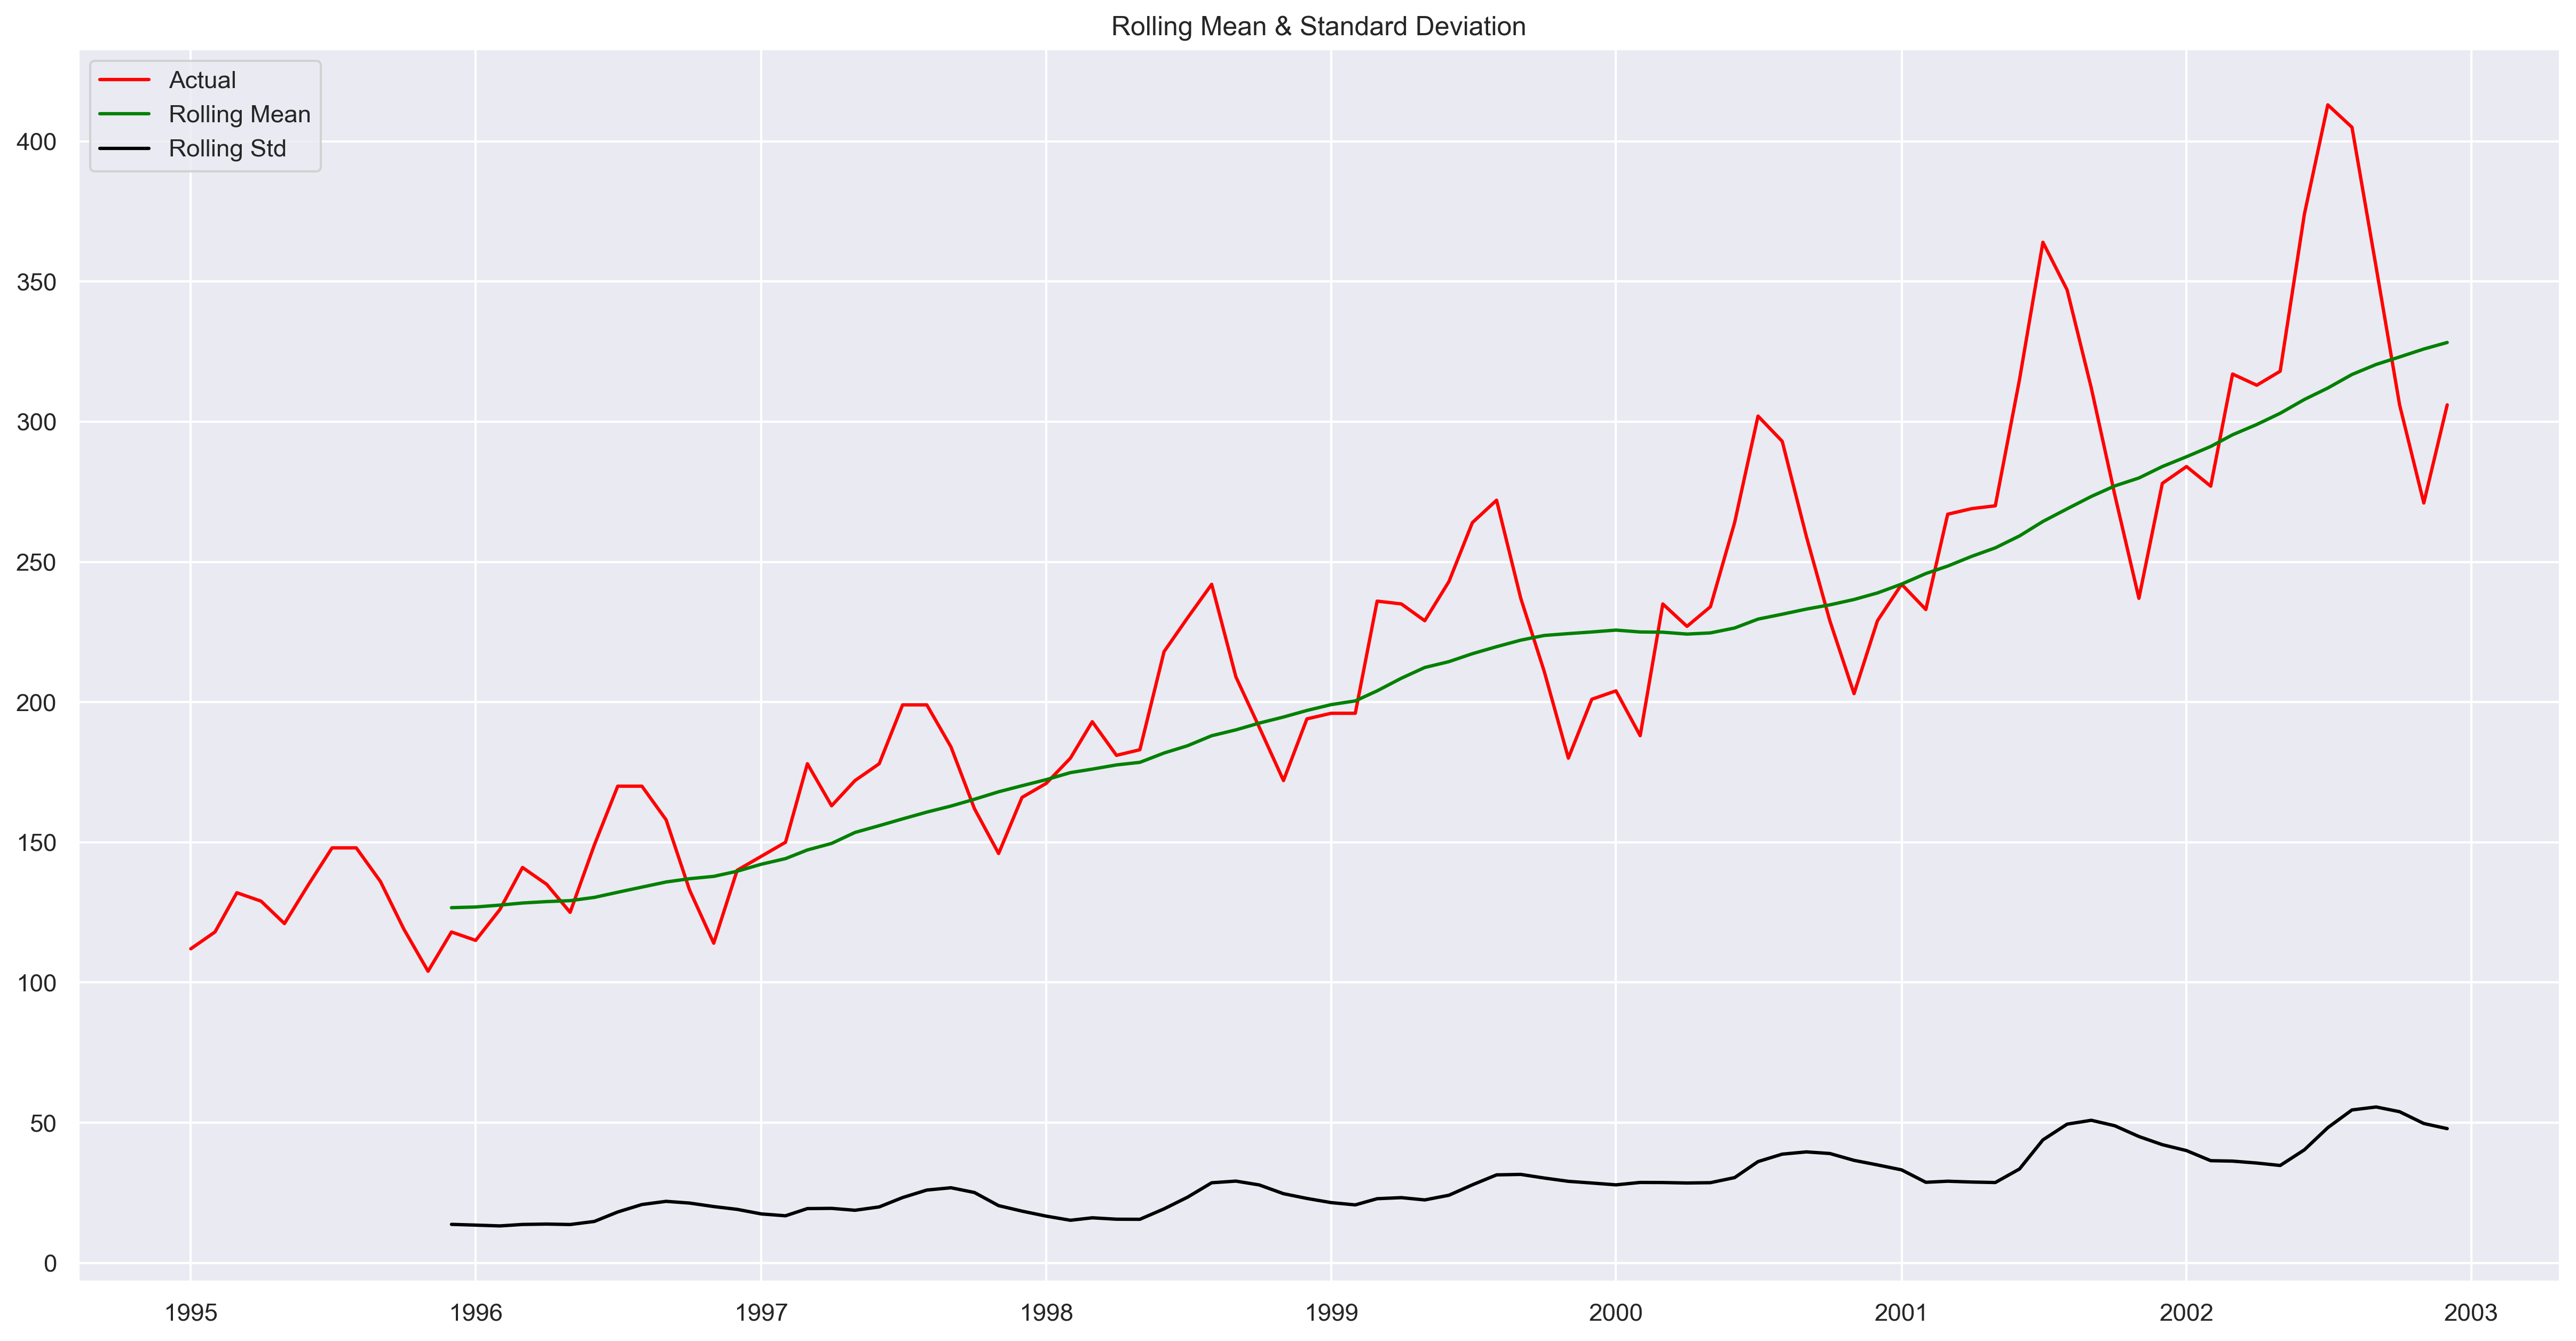

In [42]:
plt.figure(figsize=(20,10))
actual=plt.plot(df, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [43]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(df['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [44]:
import numpy as np
plt.figure(figsize=(20,10))
data_log=np.log(df)

<Figure size 6000x3000 with 0 Axes>

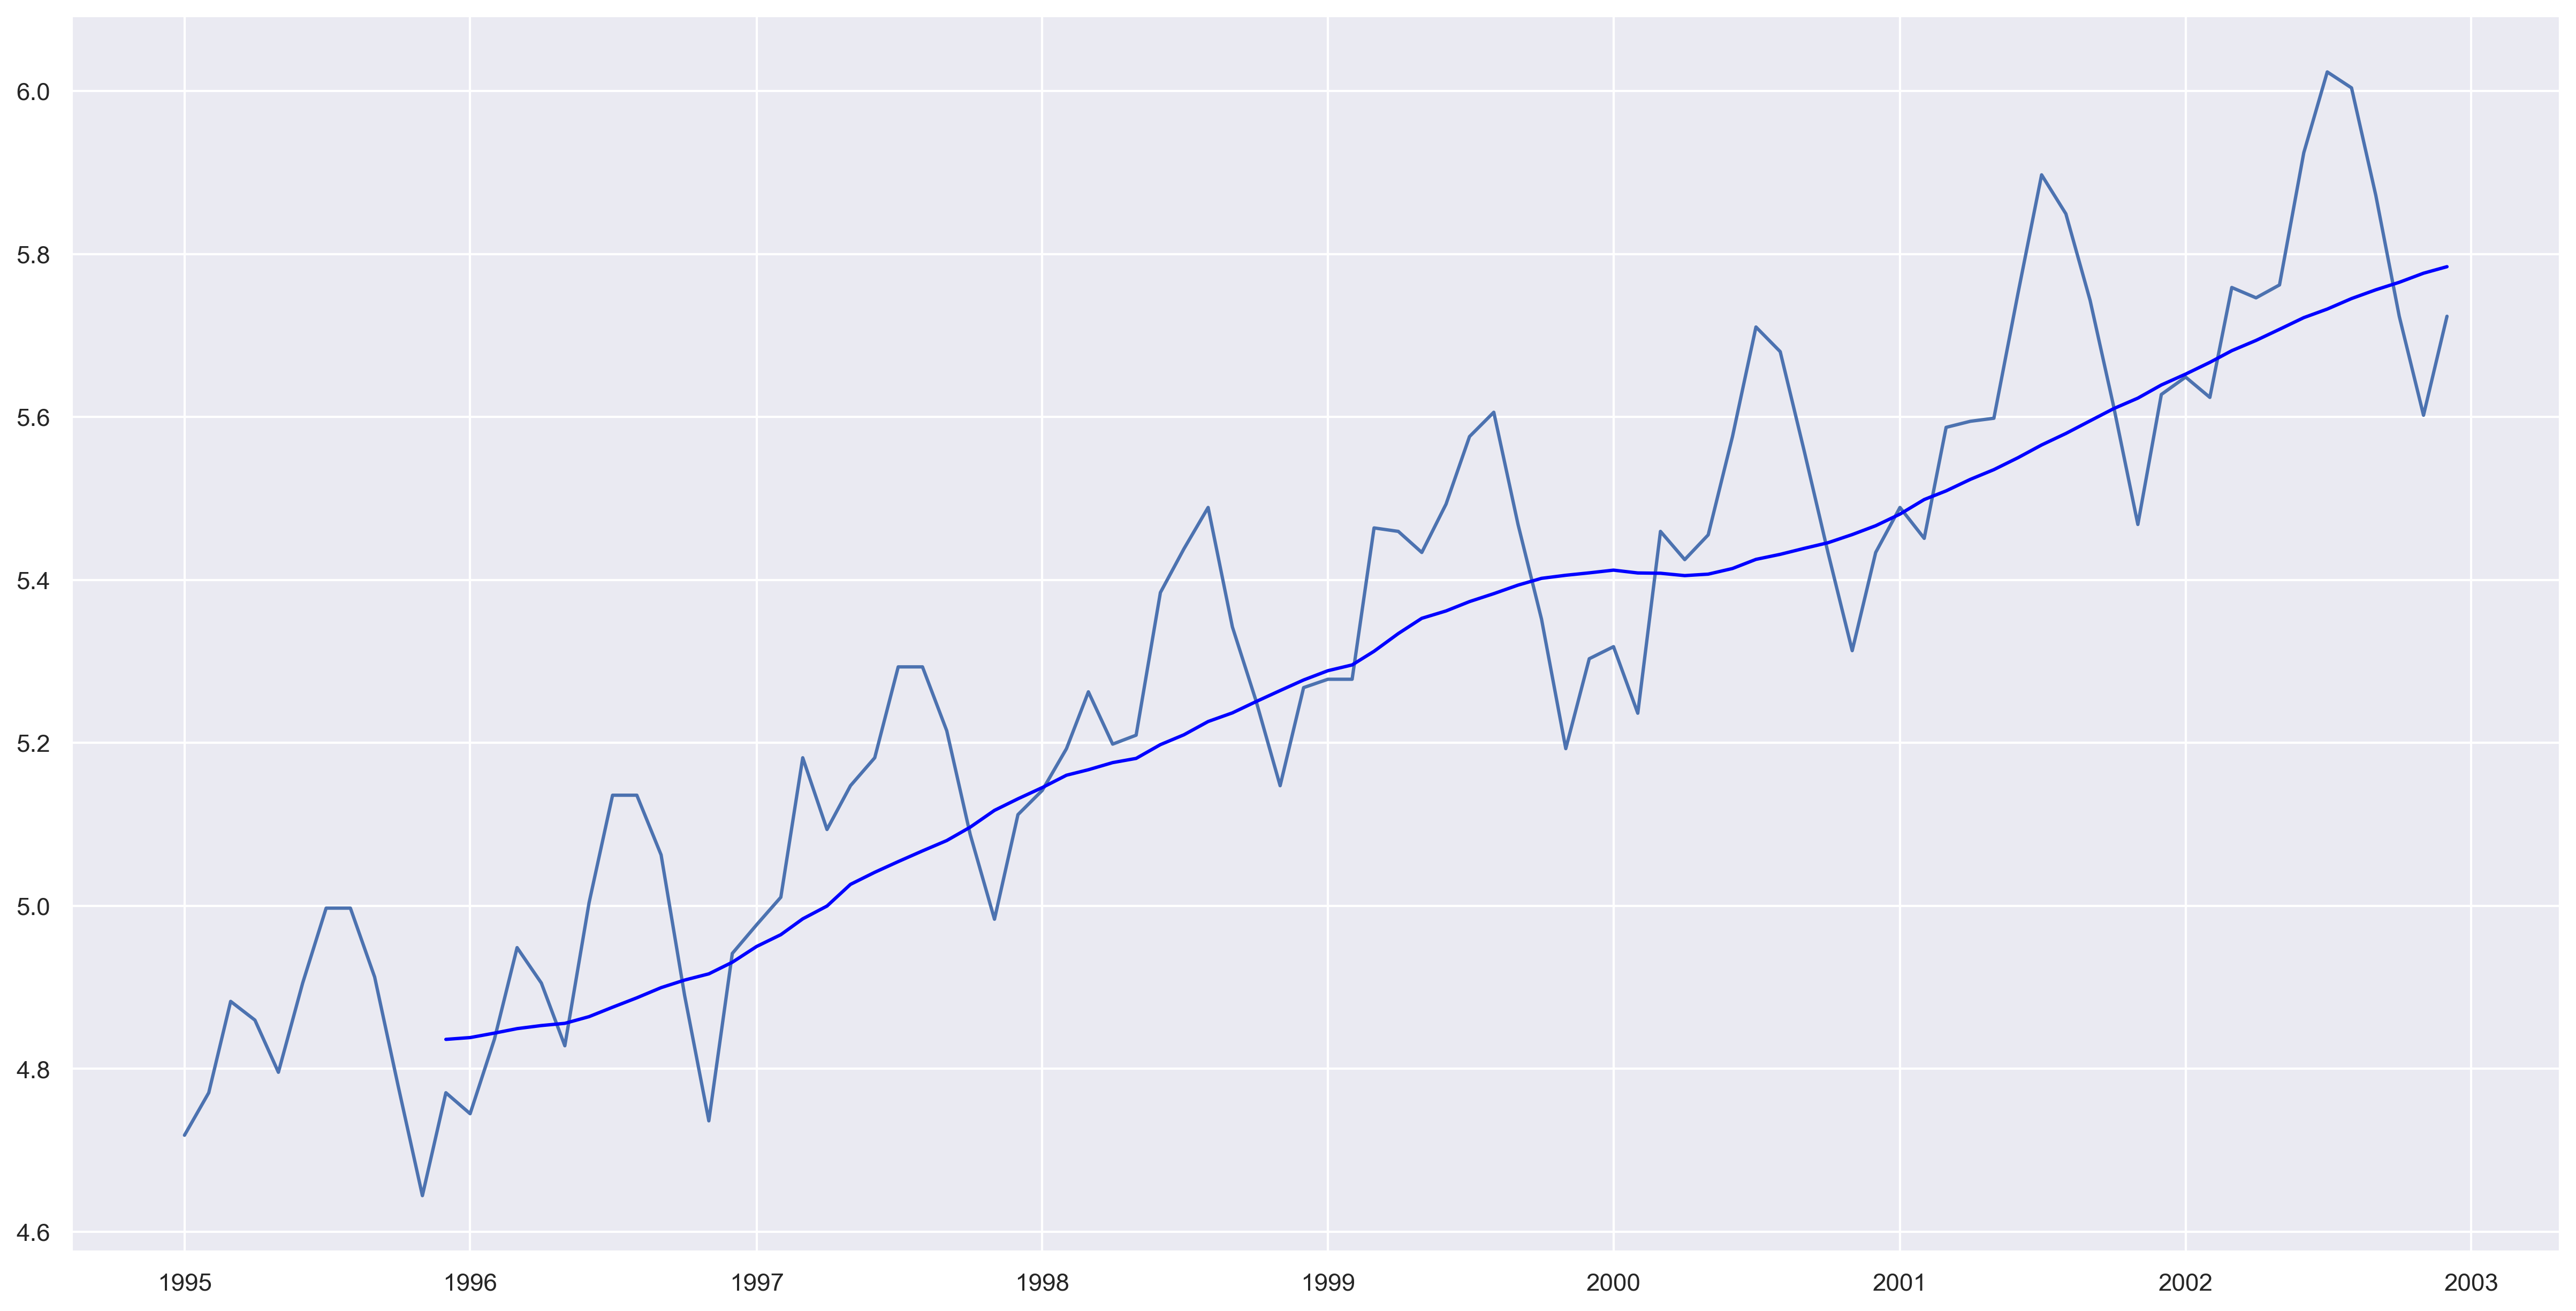

In [45]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [46]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
1995-06-01,NaN
1995-07-01,NaN
1995-08-01,NaN
1995-09-01,NaN


In [47]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


# Autocorrelation plot

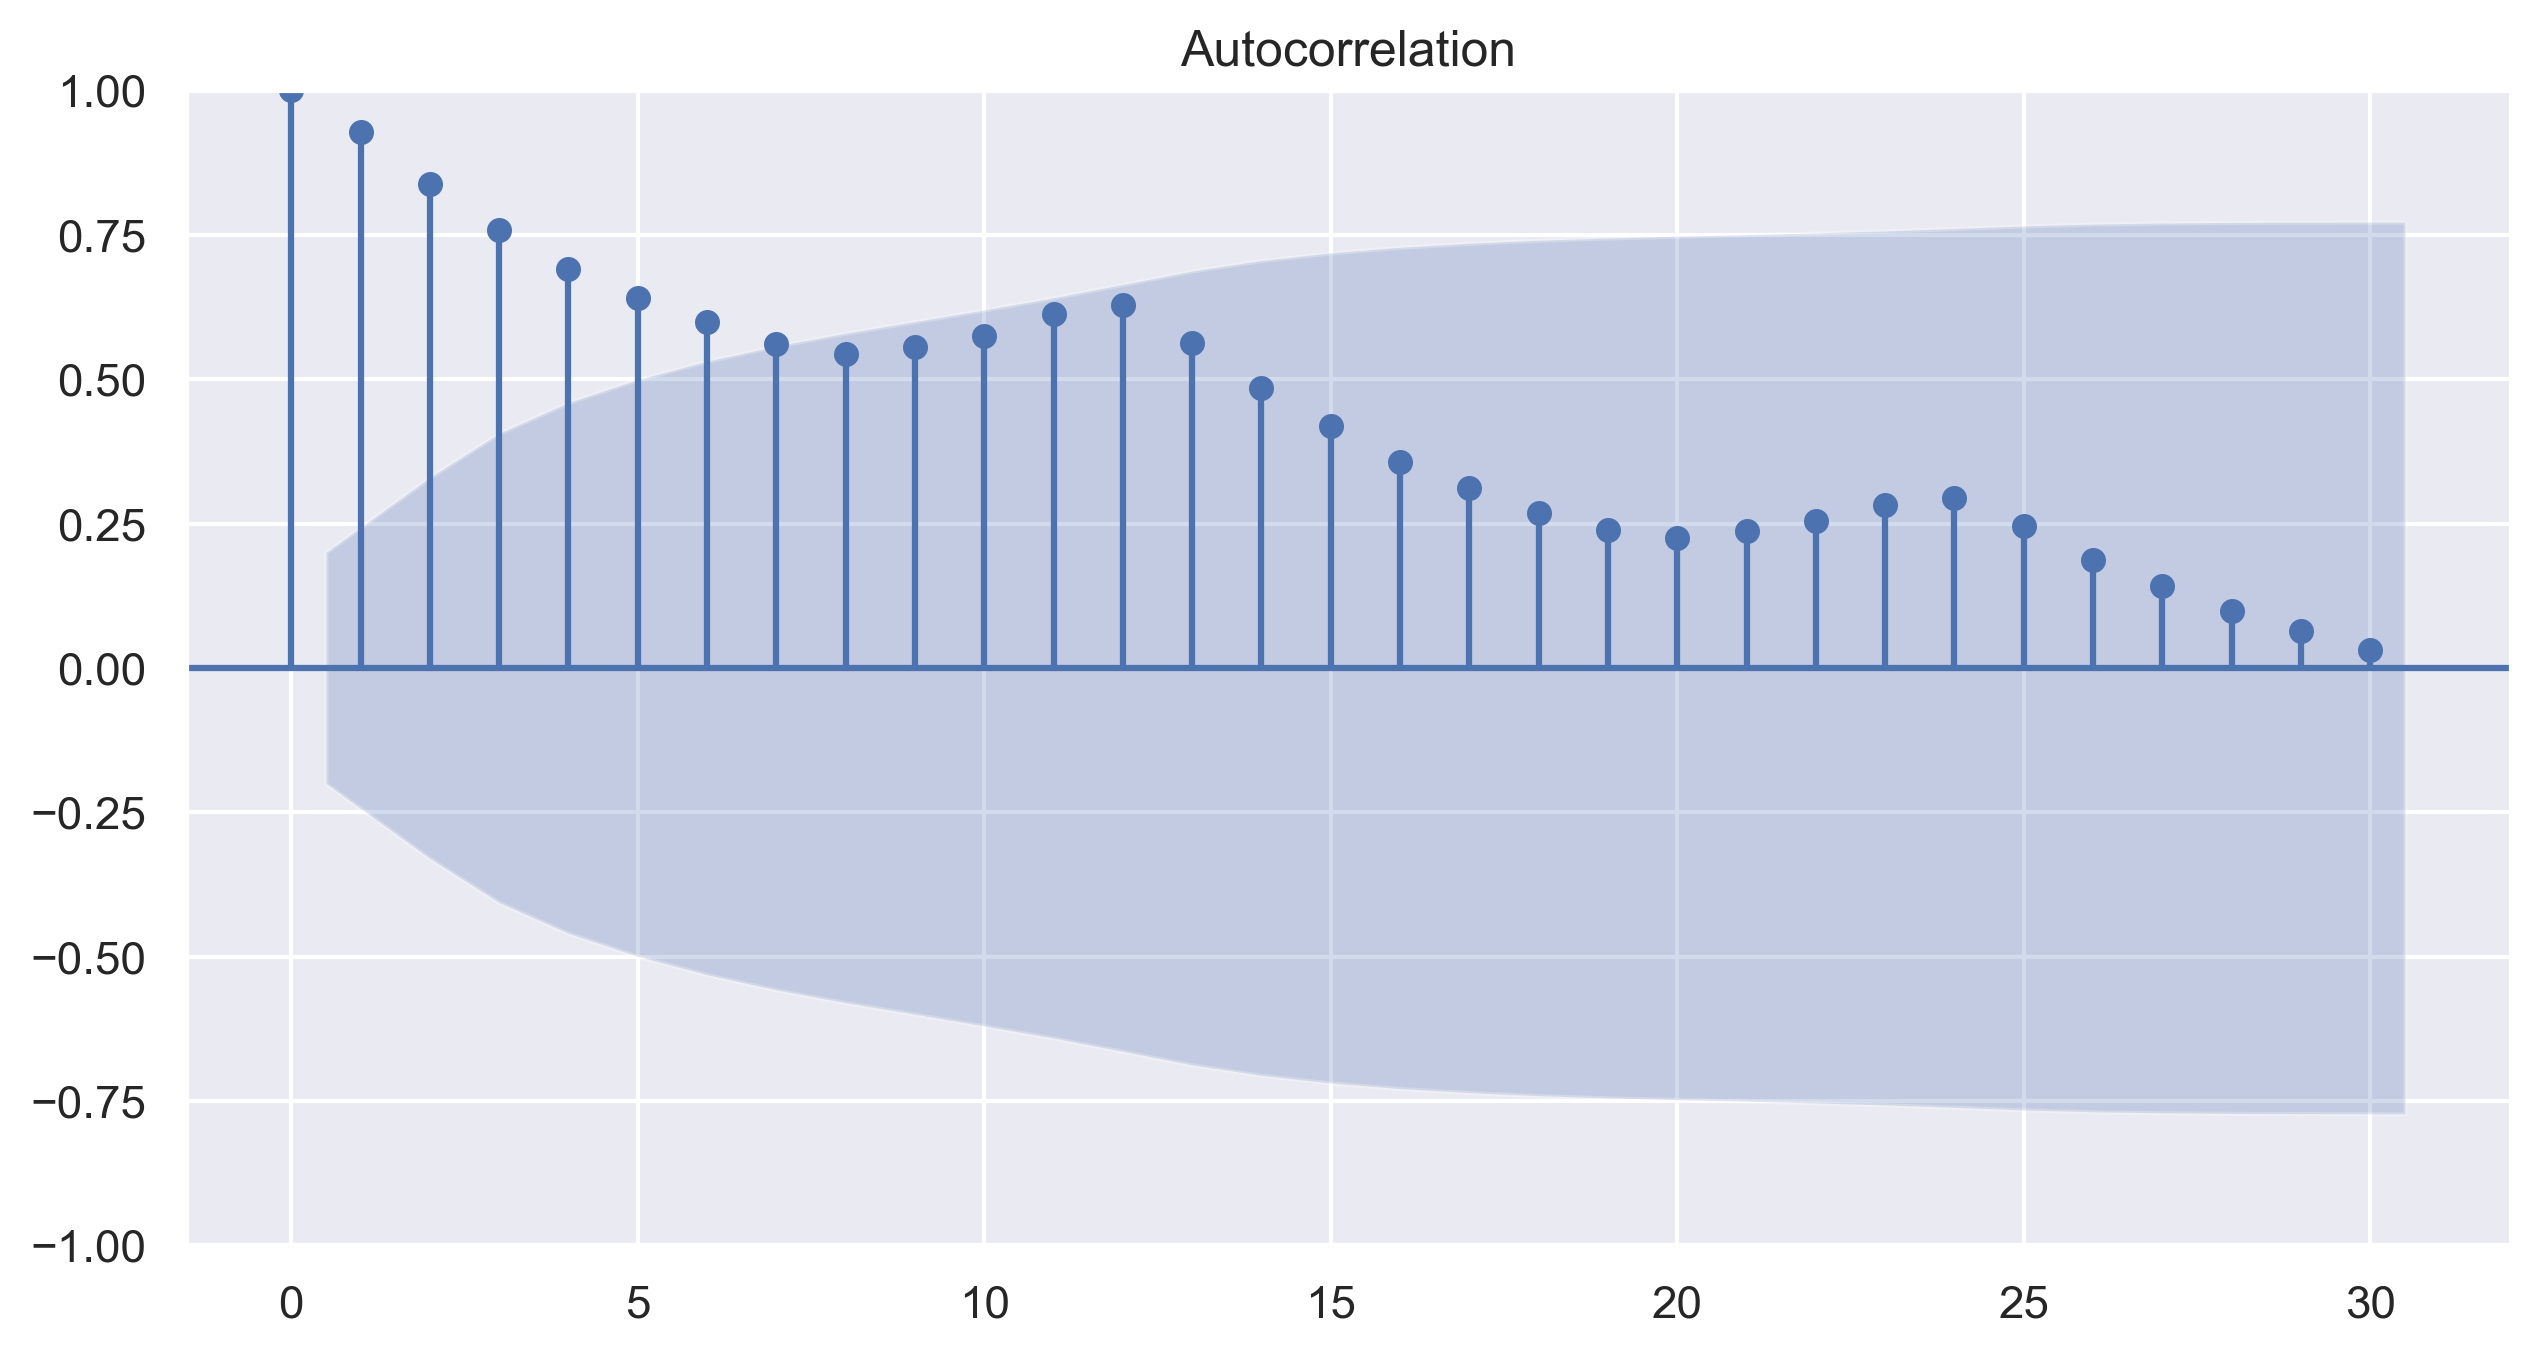

In [48]:
# create an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Passengers'], lags=30)
plt.show()

In [49]:
import numpy as np
df =pd.read_excel('Airlines+Data.xlsx')


# Calculate 't' and 't2' columns
df['t'] = np.arange(1, len(df) + 1)
df['t2'] = df['t'] ** 2

# Calculate 'logy' column (natural logarithm of 'Passengers')
df['log_Passengers'] = np.log(df['Passengers'])





# Convert the "Month" column to datetime objects
df['Month'] = pd.to_datetime(df['Month'])

# Create dummy variables for each month
dummy_months = pd.get_dummies(df['Month'].dt.month, prefix='Month')

# # Convert 'True' and 'False' to 1 and 0
dummy_months = dummy_months.astype(int)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummy_months], axis=1)


# Print the updated DataFrame
df.head()

Train = df.head(70)
Test = df.tail(26)
Train.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           70 non-null     datetime64[ns]
 1   Passengers      70 non-null     int64         
 2   t               70 non-null     int32         
 3   t2              70 non-null     int32         
 4   log_Passengers  70 non-null     float64       
 5   Month_1         70 non-null     int32         
 6   Month_2         70 non-null     int32         
 7   Month_3         70 non-null     int32         
 8   Month_4         70 non-null     int32         
 9   Month_5         70 non-null     int32         
 10  Month_6         70 non-null     int32         
 11  Month_7         70 non-null     int32         
 12  Month_8         70 non-null     int32         
 13  Month_9         70 non-null     int32         
 14  Month_10        70 non-null     int32         
 15  Month_11

(96, 17)

# Model building

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:


#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
rmse_linear = np.sqrt(mean_squared_error(Test['Passengers'], pred_linear))
rmse_linear

48.30985585336206

In [52]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Passengers'], pred_Exp))
rmse_Exp

298.12659699761343

In [53]:
#Quadratic 

Quad = smf.ols('Passengers~t+t2',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t2"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Passengers'],pred_Quad))
rmse_Quad

43.89814496742655

In [54]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea))
rmse_add_sea

124.97569951828821

In [55]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t2+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','t','t2']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea_quad))
rmse_add_sea_quad

30.393042895916523

In [56]:
#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_Mult_add_sea))
rmse_Mult_add_sea 

298.1366141717191

In [57]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,30.393043
2,rmse_Quad,43.898145
0,rmse_linear,48.309856
3,rmse_add_sea,124.975700
1,rmse_Exp,298.126597
5,rmse_Mult_sea,298.136614


By looking at the above RMSE_Values, we can conclude that the best model is Additive Seasonality Quadratic model because it is showing the lowest RMSE value.

# Moving Average

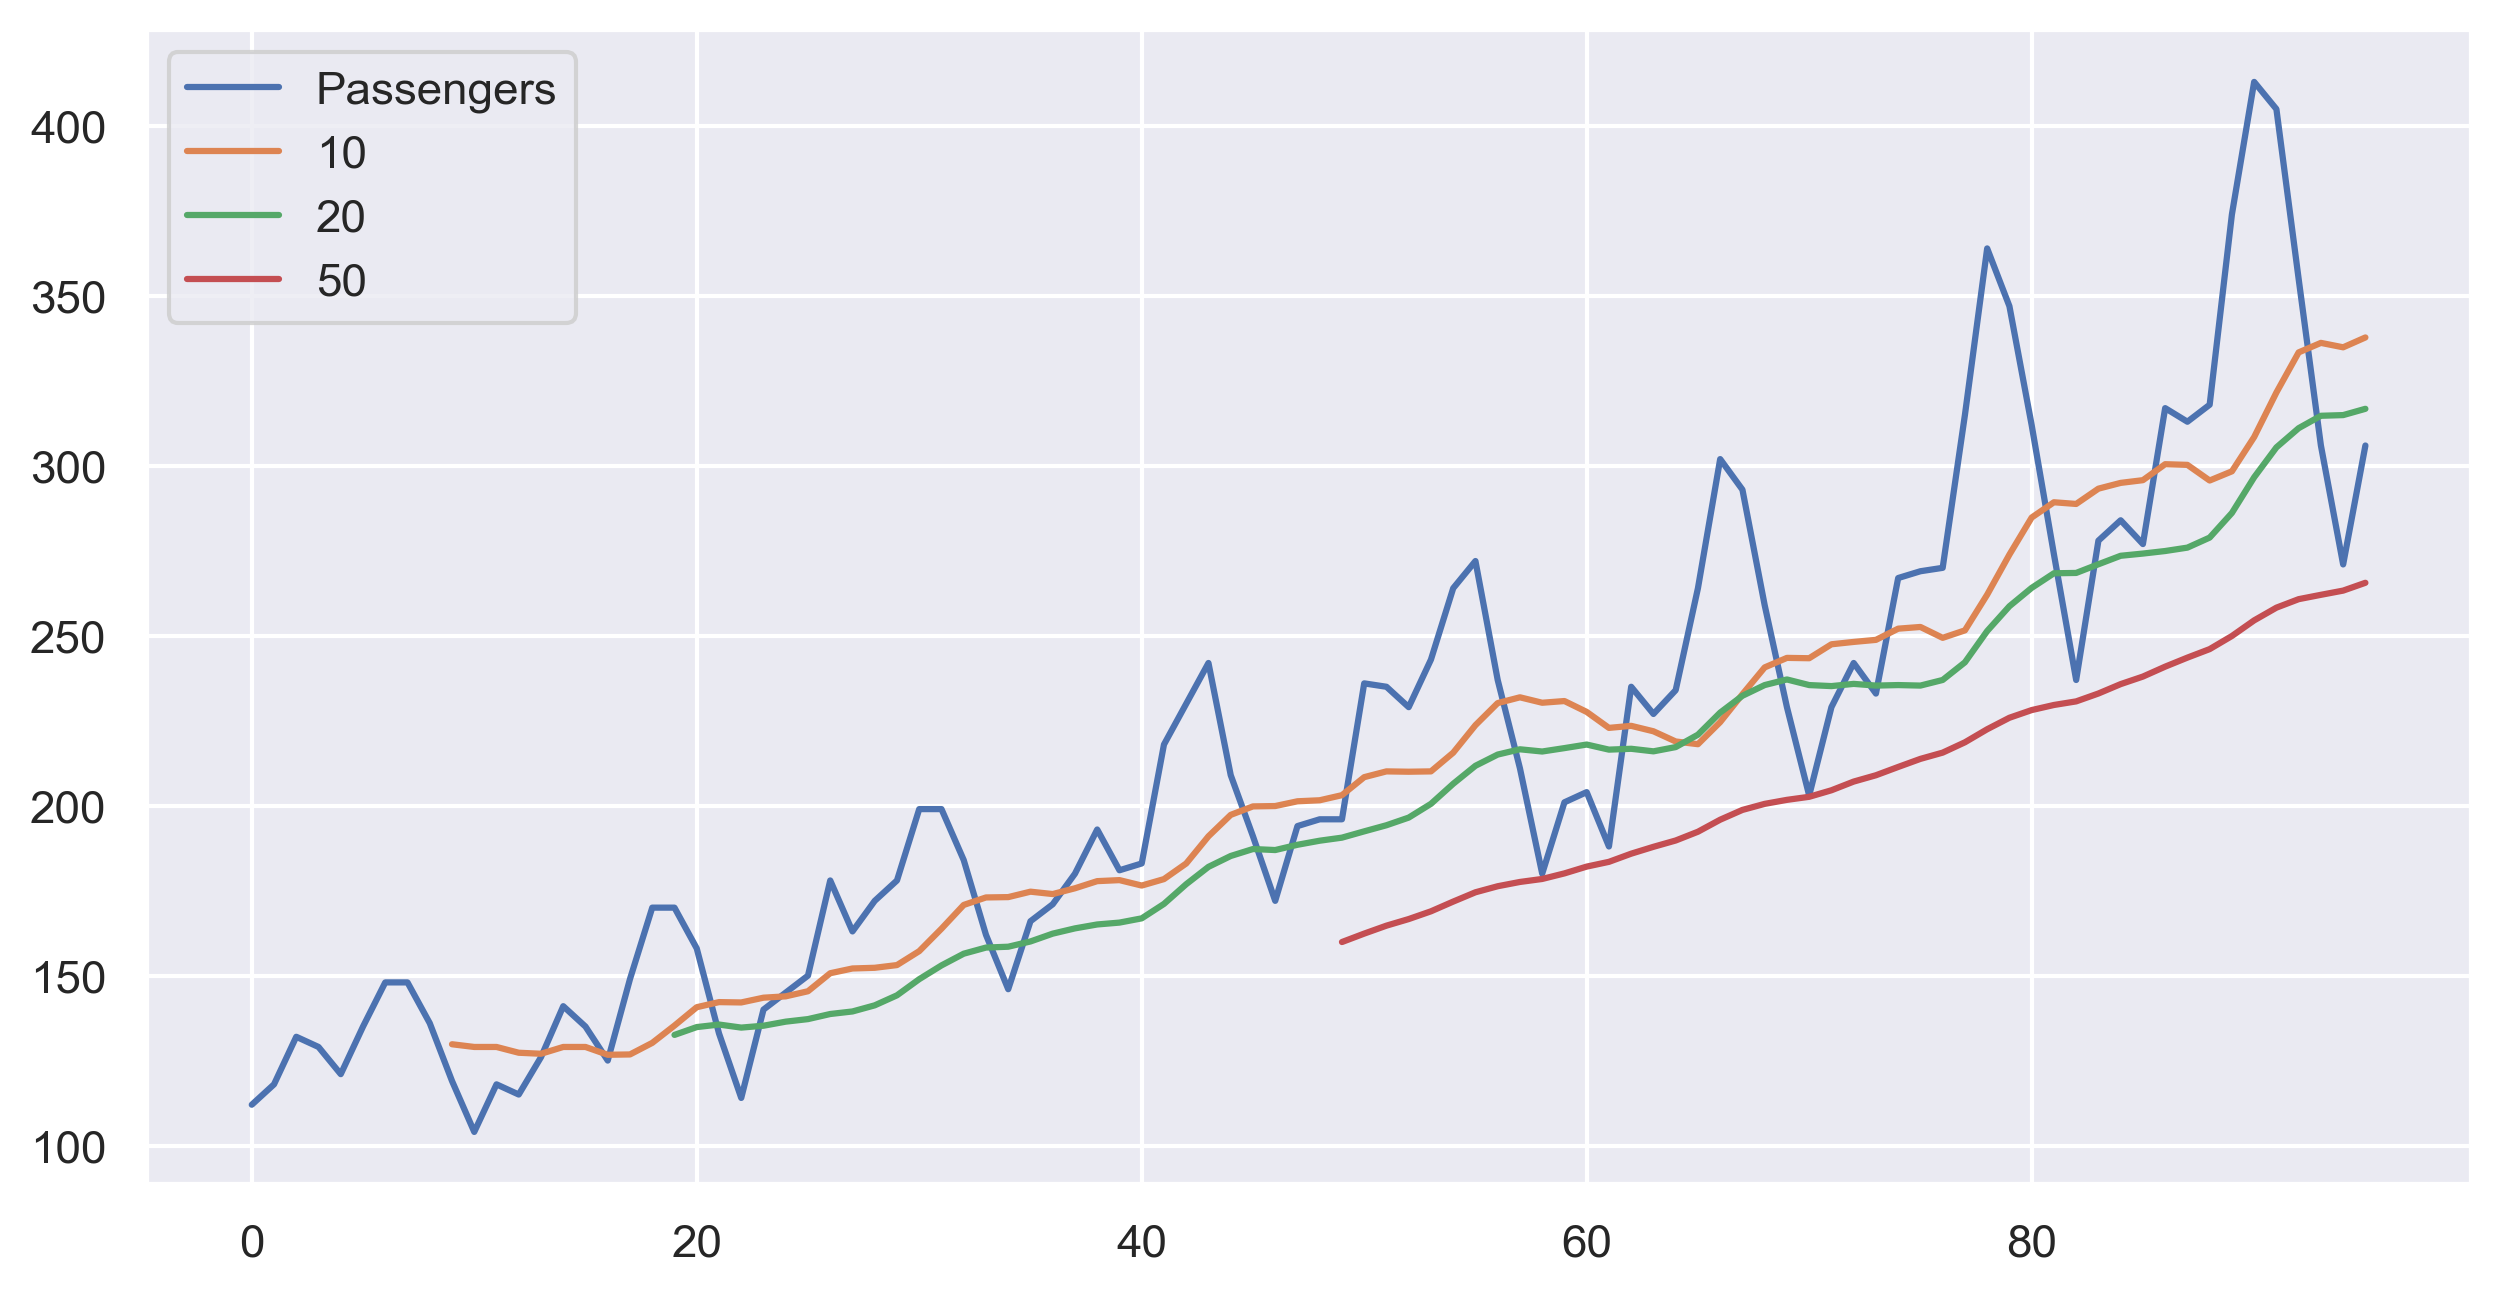

In [58]:
df['Passengers'].plot()
df['Passengers'].rolling(10).mean().plot(label = '10')
df['Passengers'].rolling(20).mean().plot(label = '20')
df['Passengers'].rolling(50).mean().plot(label = 50)
plt.legend()

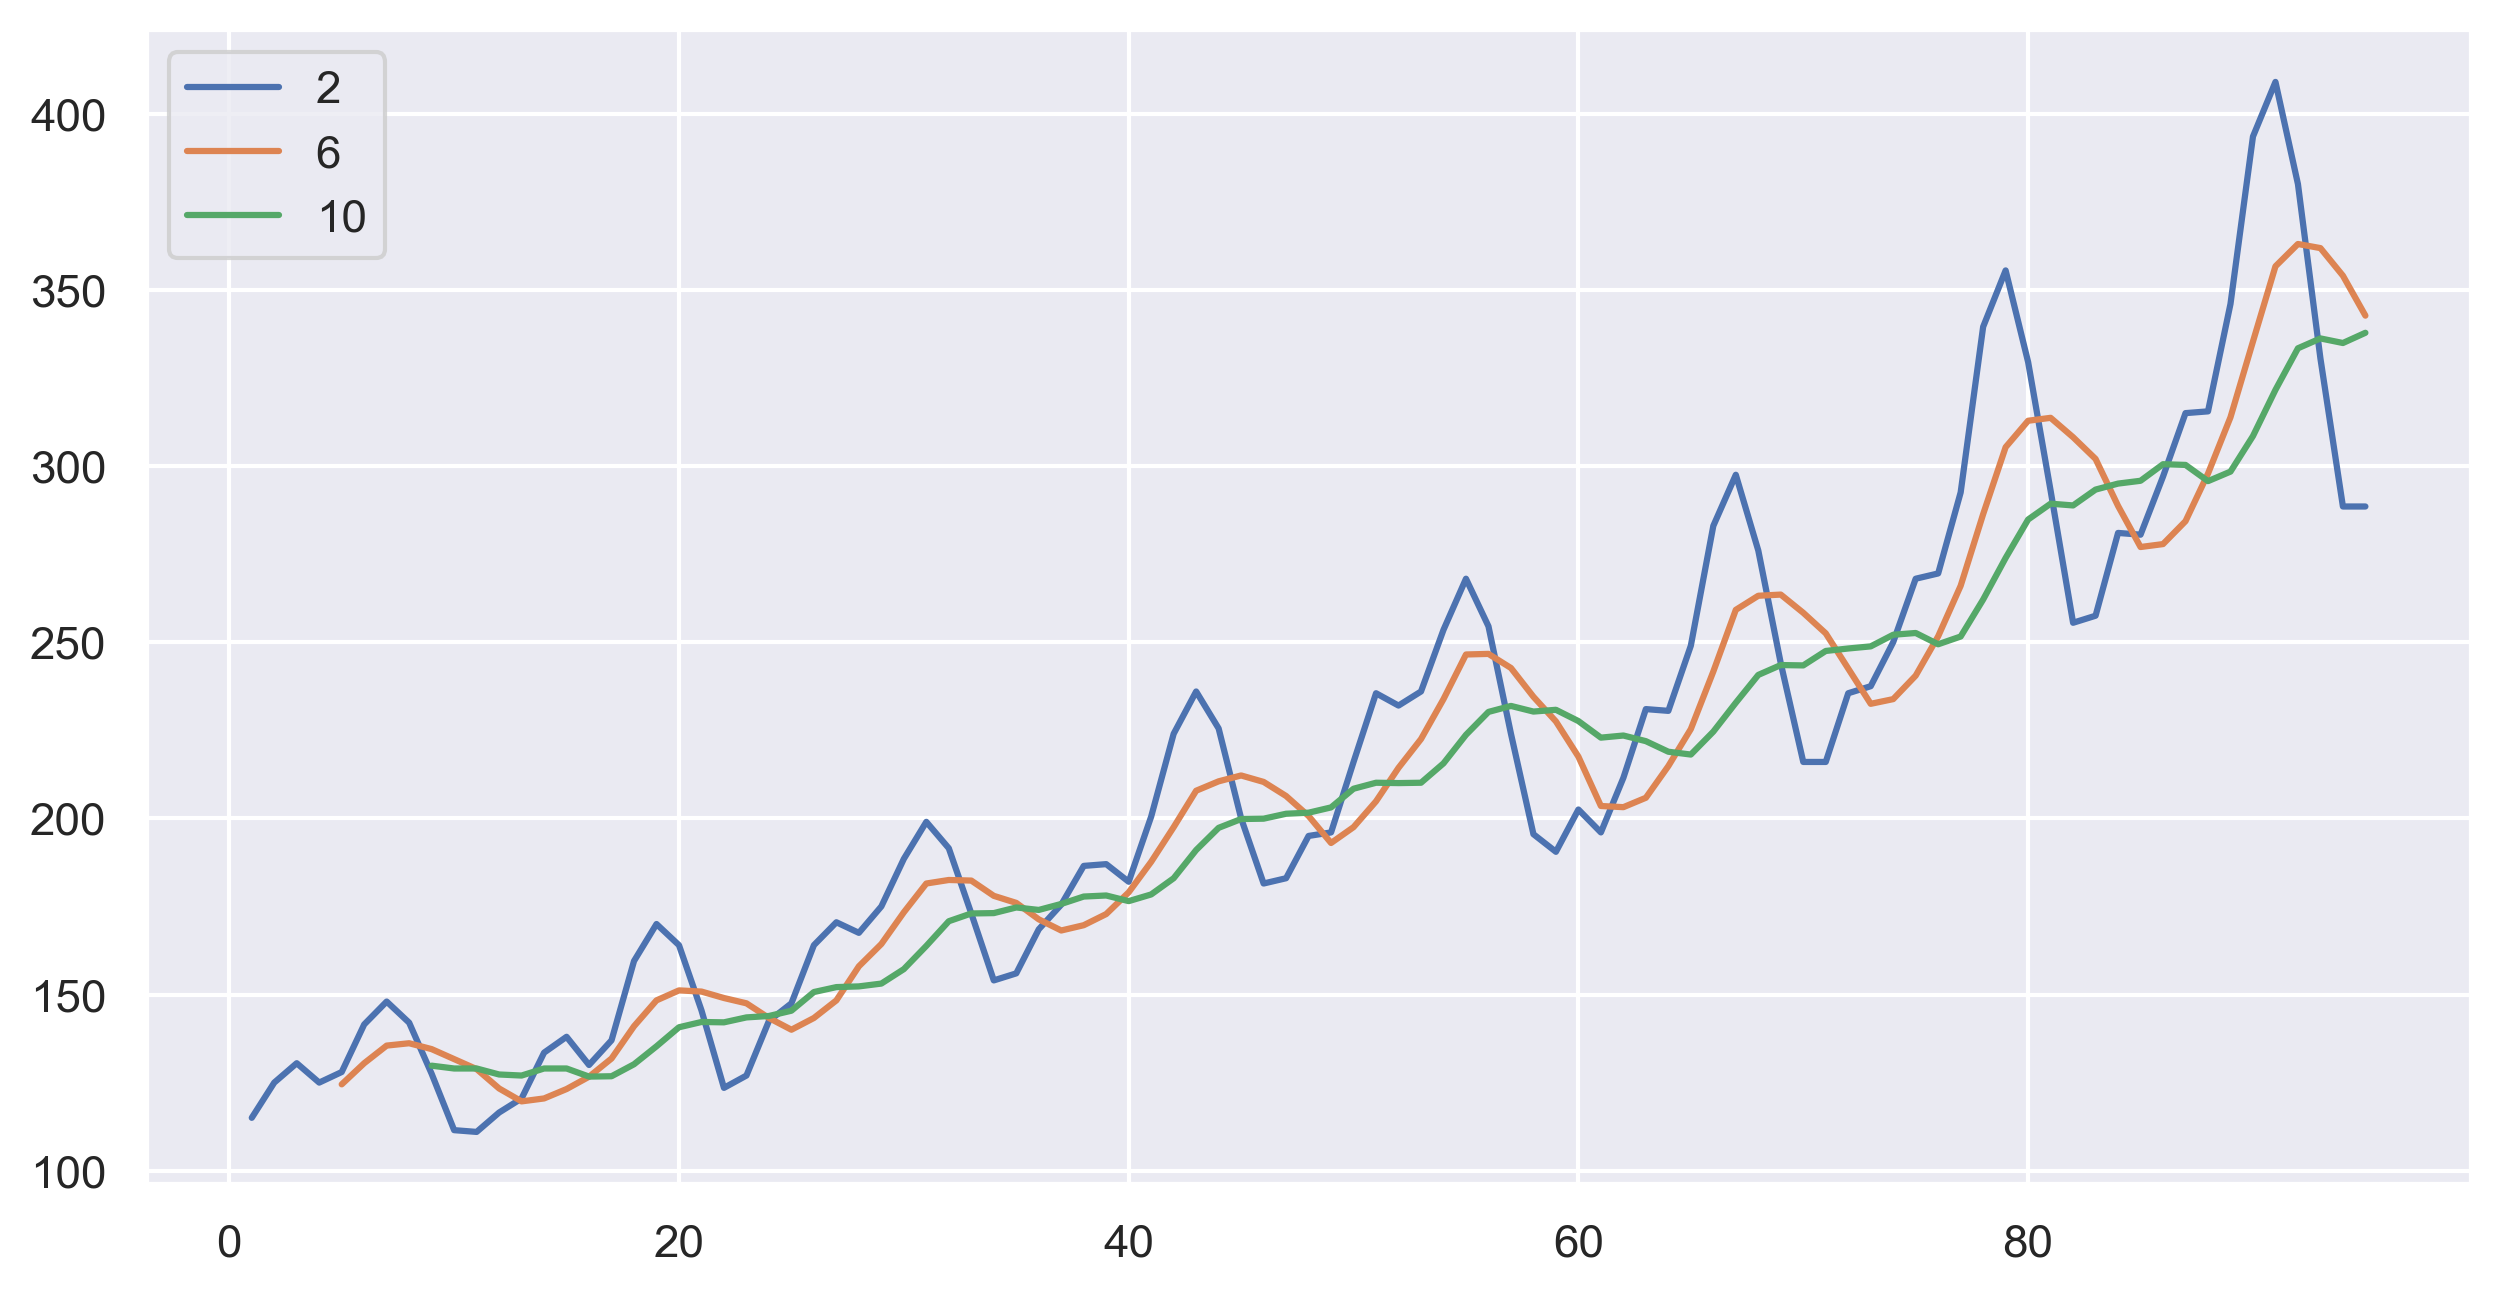

In [59]:
for i in range(2,12,4):
    df['Passengers'].rolling(i).mean().plot(label = str(i))
    plt.legend()

Null hypothesis: Data is Non stationary

Alternate Hypothesis: Data is Stationary

    If p< 0.05 ; Data is stationary

    if p>0.05; Data is not stationary

According the p-value, the dataset is stationary as the p value is less than alpha value.

# Arima model building:
    ARIMA is composed of 3 terms(Auto-Regression(p) + Integrated(d) + Moving-Average(q))
    First, we need to find out the order of arima model.

In [60]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [61]:
order = auto_arima(df['Passengers'])

In [62]:
order

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [63]:
df.shape

(96, 17)

In [64]:
#Split the data
train = df.iloc[:-30]
test = df.iloc[-30:]

In [65]:
train.shape

(66, 17)

In [66]:
test.shape

(30, 17)

In [67]:
#ARIMA model
model = ARIMA(train['Passengers'], order=(1, 0, 5)).fit()

# Evaluating the model

In [68]:
test

,Month,Passengers,t,t2,log_Passengers,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
66,2000-07-01,302,67,4489,5.710427,0,0,0,0,0,0,1,0,0,0,0,0
67,2000-08-01,293,68,4624,5.680173,0,0,0,0,0,0,0,1,0,0,0,0
68,2000-09-01,259,69,4761,5.556828,0,0,0,0,0,0,0,0,1,0,0,0
69,2000-10-01,229,70,4900,5.433722,0,0,0,0,0,0,0,0,0,1,0,0
70,2000-11-01,203,71,5041,5.313206,0,0,0,0,0,0,0,0,0,0,1,0
71,2000-12-01,229,72,5184,5.433722,0,0,0,0,0,0,0,0,0,0,0,1
72,2001-01-01,242,73,5329,5.488938,1,0,0,0,0,0,0,0,0,0,0,0
73,2001-02-01,233,74,5476,5.451038,0,1,0,0,0,0,0,0,0,0,0,0
74,2001-03-01,267,75,5625,5.587249,0,0,1,0,0,0,0,0,0,0,0,0
75,2001-04-01,269,76,5776,5.594711,0,0,0,1,0,0,0,0,0,0,0,0


In [69]:
ypred = model.predict(start =66, end = 95)
ypred

66    246.882274
67    253.930633
68    240.858972
69    222.175643
70    231.656580
71    230.944628
72    230.241884
73    229.548228
74    228.863545
75    228.187717
76    227.520630
77    226.862171
78    226.212228
79    225.570692
80    224.937453
81    224.312404
82    223.695439
83    223.086454
84    222.485346
85    221.892012
86    221.306352
87    220.728267
88    220.157659
89    219.594431
90    219.038487
91    218.489734
92    217.948079
93    217.413429
94    216.885694
95    216.364785
Name: predicted_mean, dtype: float64

In [70]:
print(np.sqrt(mean_squared_error(test['Passengers'], ypred)))

88.22076162814318
